---

# Weather analysis, effect of environmental conditions on AQI and Air quality index prediction using MLR.

---
`BY: SARTHAK SANJAY BOKADE`


```
AIM: To study the trends of the environmetal conditions such as temparature, CO2 emission, its effect on AQI and the analysis of AQI.

*   Analysis of Temparature for the cities
*   Effect of COVID-19 in AQI and CO2 emission data.
*   Analysis of CO2 for the countries at global level.
*   Analysis of AQI for DELHI
*   Variation of CO2 over the Number of registered vehicles in INDIA.
*   Prediction of AQI (using MLR)


```







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.graph_objects as go
import plotly.express as px

# DATASETS

*   Weather dataset link : https://www.ncei.noaa.gov/cdo-web/search (National Oceanic and Atmospheric Administration, Govt. of United States)
*   AQI dataset link : https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

*   World CO2 dataset : https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

*   Registered vehicles in INDIA (Fuel type): https://www.kaggle.com/datasets/prasenjitsharma/fuel-type-wise-vehicle-registration-india
*   City wise registered vehicles dataset :  https://morth.nic.in/sites/default/files/RTYB_Publication_2019_20%20(1).pdf  (Ministry of Road transport and highways, Govt. of INDIA)
*   Link to google drive (ALL datasets): https://drive.google.com/drive/folders/1dbIQkWSrIy8ASDQmtIf2QwLMRLqJKslY?usp=sharing







In [ ]:
mumbai_df  = pd.read_csv("/content/drive/MyDrive/weather datasets/mumbai.csv")
aqi_df = pd.read_csv("/content/drive/MyDrive/weather datasets/city_day.csv")
bhopal_df=pd.read_csv("/content/drive/MyDrive/weather datasets/bhopal.csv")
delhi_df=pd.read_csv("/content/drive/MyDrive/weather datasets/delhi.csv")
chandigarh_df=pd.read_csv("/content/drive/MyDrive/weather datasets/chandigarh.csv")
hyd_df=pd.read_csv("/content/drive/MyDrive/weather datasets/hyd.csv")
jaipur_df=pd.read_csv("/content/drive/MyDrive/weather datasets/jaipur.csv")
kolkata_df=pd.read_csv("/content/drive/MyDrive/weather datasets/kolkata.csv")
lucknow_df=pd.read_csv("/content/drive/MyDrive/weather datasets/lucknow.csv")
patna_df=pd.read_csv("/content/drive/MyDrive/weather datasets/patna.csv")
shillong_df=pd.read_csv("/content/drive/MyDrive/weather datasets/shillong.csv")
trivandrum_df=pd.read_csv("/content/drive/MyDrive/weather datasets/trivandrum.csv")
chennai_df=pd.read_csv("/content/drive/MyDrive/weather datasets/chennai.csv")

Integrating the weather dataset which is collected from the National Oceanic and Atmospheric Administration(NOAA) by the US government.

In [ ]:
mumbai_df

STATION                  NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN012070800  BOMBAY SANTACRUZ, IN  2000-01-01   0.0    78  93.0   NaN
1     IN012070800  BOMBAY SANTACRUZ, IN  2000-01-02   0.0    79  92.0  65.0
2     IN012070800  BOMBAY SANTACRUZ, IN  2000-01-03   0.0    79  92.0   NaN
3     IN012070800  BOMBAY SANTACRUZ, IN  2000-01-04   0.0    79  91.0  63.0
4     IN012070800  BOMBAY SANTACRUZ, IN  2000-01-05   0.0    79  91.0  64.0
...           ...                   ...         ...   ...   ...   ...   ...
8694  IN012070800  BOMBAY SANTACRUZ, IN  2023-10-24   NaN    88   NaN  76.0
8695  IN012070800  BOMBAY SANTACRUZ, IN  2023-10-25   NaN    88   NaN  74.0
8696  IN012070800  BOMBAY SANTACRUZ, IN  2023-10-26   NaN    87   NaN  72.0
8697  IN012070800  BOMBAY SANTACRUZ, IN  2023-10-27   NaN    87   NaN  71.0
8698  IN012070800  BOMBAY SANTACRUZ, IN  2023-10-28   NaN    87   NaN  71.0

[8699 rows x 7 columns]

In [ ]:
mumbai_df['NAME'].unique()

array(['BOMBAY SANTACRUZ, IN'], dtype=object)

In [ ]:
aqi_df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [ ]:
aqi_df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
mumbai_df["NAME"]="Mumbai"

In [ ]:
mumbai_df

STATION    NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN012070800  Mumbai  2000-01-01   0.0    78  93.0   NaN
1     IN012070800  Mumbai  2000-01-02   0.0    79  92.0  65.0
2     IN012070800  Mumbai  2000-01-03   0.0    79  92.0   NaN
3     IN012070800  Mumbai  2000-01-04   0.0    79  91.0  63.0
4     IN012070800  Mumbai  2000-01-05   0.0    79  91.0  64.0
...           ...     ...         ...   ...   ...   ...   ...
8694  IN012070800  Mumbai  2023-10-24   NaN    88   NaN  76.0
8695  IN012070800  Mumbai  2023-10-25   NaN    88   NaN  74.0
8696  IN012070800  Mumbai  2023-10-26   NaN    87   NaN  72.0
8697  IN012070800  Mumbai  2023-10-27   NaN    87   NaN  71.0
8698  IN012070800  Mumbai  2023-10-28   NaN    87   NaN  71.0

[8699 rows x 7 columns]

In [ ]:
aqi_df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
bhopal_df["NAME"]="Bhopal"

In [ ]:
bhopal_df

STATION    NAME        DATE  PRCP  TAVG   TMAX  TMIN
0     IN011272300  Bhopal  2023-07-05   NaN    87  100.0  78.0
1     IN011351500  Bhopal  2000-01-01   0.0    66   77.0  50.0
2     IN011351500  Bhopal  2000-01-02   0.0    61   76.0  45.0
3     IN011351500  Bhopal  2000-01-03   0.0    60   75.0  44.0
4     IN011351500  Bhopal  2000-01-04   0.0    62   75.0  45.0
...           ...     ...         ...   ...   ...    ...   ...
8642  IN011351500  Bhopal  2023-10-24   NaN    79    NaN  63.0
8643  IN011351500  Bhopal  2023-10-25   NaN    78    NaN  61.0
8644  IN011351500  Bhopal  2023-10-26   NaN    78    NaN  63.0
8645  IN011351500  Bhopal  2023-10-27   NaN    77    NaN  60.0
8646  IN011351500  Bhopal  2023-10-28   NaN    77    NaN  58.0

[8647 rows x 7 columns]

In [ ]:
delhi_df["NAME"]="Delhi"

In [ ]:
delhi_df

STATION   NAME        DATE  PRCP  TAVG  TMAX  TMIN
0      IN022023000  Delhi  2000-01-01   NaN    52   NaN   NaN
1      IN022023000  Delhi  2000-01-02   NaN    55   NaN   NaN
2      IN022023000  Delhi  2000-01-03   NaN    53   NaN   NaN
3      IN022023000  Delhi  2000-01-04   NaN    53   NaN   NaN
4      IN022023000  Delhi  2000-01-05   NaN    53   NaN   NaN
...            ...    ...         ...   ...   ...   ...   ...
17244  IN022021900  Delhi  2023-10-24   NaN    74  89.0  61.0
17245  IN022021900  Delhi  2023-10-25   NaN    74  90.0  61.0
17246  IN022021900  Delhi  2023-10-26   NaN    74  89.0  60.0
17247  IN022021900  Delhi  2023-10-27   NaN    73  89.0  59.0
17248  IN022021900  Delhi  2023-10-28   NaN    73  90.0  58.0

[17249 rows x 7 columns]

In [ ]:
chandigarh_df["NAME"].unique()

array(['CHANDIGARH IAFB, IN', 'AMBALA, IN'], dtype=object)

In [ ]:
chandigarh_df["NAME"]="Chandigarh"

In [ ]:
chandigarh_df

STATION        NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN006011400  Chandigarh  2015-12-07   NaN    60  75.0   NaN
1     IN006011400  Chandigarh  2015-12-08   NaN    61  75.0  52.0
2     IN006011400  Chandigarh  2015-12-09   NaN    61  74.0  50.0
3     IN006011400  Chandigarh  2015-12-10   NaN    64  72.0  53.0
4     IN006011400  Chandigarh  2015-12-11   NaN    61  72.0   NaN
...           ...         ...         ...   ...   ...   ...   ...
5719  IN006012800  Chandigarh  2023-10-24   NaN    74  87.0  62.0
5720  IN006012800  Chandigarh  2023-10-25   NaN    75  89.0  63.0
5721  IN006012800  Chandigarh  2023-10-26   NaN    75  87.0  64.0
5722  IN006012800  Chandigarh  2023-10-27   NaN    74  89.0  62.0
5723  IN006012800  Chandigarh  2023-10-28   NaN    73  88.0  62.0

[5724 rows x 7 columns]

In [ ]:
hyd_df["NAME"]="Hyderabad"

In [ ]:
hyd_df

STATION       NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN001080500  Hyderabad  2000-01-01   0.0    71  82.0  60.0
1     IN001080500  Hyderabad  2000-01-02   0.0    68  81.0   NaN
2     IN001080500  Hyderabad  2000-01-03   0.0    67  83.0   NaN
3     IN001080500  Hyderabad  2000-01-04   0.0    69  83.0  53.0
4     IN001080500  Hyderabad  2000-01-05   0.0    69  83.0  55.0
...           ...        ...         ...   ...   ...   ...   ...
8692  IN001080500  Hyderabad  2023-10-24   NaN    78   NaN  65.0
8693  IN001080500  Hyderabad  2023-10-25   NaN    78  90.0  64.0
8694  IN001080500  Hyderabad  2023-10-26   NaN    78  90.0  64.0
8695  IN001080500  Hyderabad  2023-10-27   NaN    78  89.0  62.0
8696  IN001080500  Hyderabad  2023-10-28   NaN    80   NaN  65.0

[8697 rows x 7 columns]

In [ ]:
jaipur_df["NAME"]="Jaipur"

In [ ]:
jaipur_df

STATION    NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN019131301  Jaipur  2000-01-01   0.0    57  74.0   NaN
1     IN019131301  Jaipur  2000-01-02   0.0    58  76.0   NaN
2     IN019131301  Jaipur  2000-01-03   0.0    59  76.0   NaN
3     IN019131301  Jaipur  2000-01-04   0.0    61  75.0   NaN
4     IN019131301  Jaipur  2000-01-05   0.0    59  76.0   NaN
...           ...     ...         ...   ...   ...   ...   ...
8267  IN019131301  Jaipur  2023-10-24   NaN    80  90.0  68.0
8268  IN019131301  Jaipur  2023-10-25   NaN    79  90.0  68.0
8269  IN019131301  Jaipur  2023-10-26   NaN    78  90.0  67.0
8270  IN019131301  Jaipur  2023-10-27   NaN    80   NaN  65.0
8271  IN019131301  Jaipur  2023-10-28   NaN    78  91.0  69.0

[8272 rows x 7 columns]

In [ ]:
kolkata_df["NAME"]="Kolkata"

In [ ]:
kolkata_df

STATION     NAME        DATE  PRCP  TAVG  TMAX  TMIN
0      IN024140300  Kolkata  2015-12-07   NaN    72  83.0   NaN
1      IN024140300  Kolkata  2015-12-08   NaN    73  83.0   NaN
2      IN024140300  Kolkata  2015-12-09   NaN    73  83.0  66.0
3      IN024140300  Kolkata  2015-12-10   NaN    74  84.0  66.0
4      IN024140300  Kolkata  2015-12-11   NaN    76  84.0  69.0
...            ...      ...         ...   ...   ...   ...   ...
11564  IN024141500  Kolkata  2023-10-24   NaN    80  88.0  75.0
11565  IN024141500  Kolkata  2023-10-25   NaN    82  90.0  75.0
11566  IN024141500  Kolkata  2023-10-26   NaN    82  91.0   NaN
11567  IN024141500  Kolkata  2023-10-27   NaN    81  88.0  75.0
11568  IN024141500  Kolkata  2023-10-28   NaN    80  88.0  73.0

[11569 rows x 7 columns]

In [ ]:
lucknow_df["NAME"]="Lucknow"

In [ ]:
lucknow_df

STATION     NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN023351400  Lucknow  2000-01-01   0.0    51  62.0   NaN
1     IN023351400  Lucknow  2000-01-02   0.0    52  60.0   NaN
2     IN023351400  Lucknow  2000-01-03   0.0    51  59.0   NaN
3     IN023351400  Lucknow  2000-01-04   0.0    53   NaN   NaN
4     IN023351400  Lucknow  2000-01-05   NaN    47  64.0   NaN
...           ...      ...         ...   ...   ...   ...   ...
8679  IN023351400  Lucknow  2023-10-24   NaN    75  89.0   NaN
8680  IN023351400  Lucknow  2023-10-25   NaN    76  89.0  63.0
8681  IN023351400  Lucknow  2023-10-26   NaN    76  90.0   NaN
8682  IN023351400  Lucknow  2023-10-27   NaN    75   NaN   NaN
8683  IN023351400  Lucknow  2023-10-28   NaN    75  92.0  62.0

[8684 rows x 7 columns]

In [ ]:
patna_df["NAME"]="Patna"

In [ ]:
patna_df

STATION   NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN004102500  Patna  2000-01-01   0.0    54   NaN  49.0
1     IN004102500  Patna  2000-01-02   0.0    53  56.0  49.0
2     IN004102500  Patna  2000-01-03   0.0    54  56.0  50.0
3     IN004102500  Patna  2000-01-04   0.0    54  63.0   NaN
4     IN004102500  Patna  2000-01-05   0.0    53  58.0  46.0
...           ...    ...         ...   ...   ...   ...   ...
8650  IN004102500  Patna  2023-10-24   NaN    83   NaN  70.0
8651  IN004102500  Patna  2023-10-25   NaN    81   NaN  71.0
8652  IN004102500  Patna  2023-10-26   NaN    80   NaN  67.0
8653  IN004102500  Patna  2023-10-27   NaN    81   NaN  68.0
8654  IN004102500  Patna  2023-10-28   NaN    80   NaN  68.0

[8655 rows x 7 columns]

In [ ]:
shillong_df["NAME"]="Shillong"

In [ ]:
shillong_df

STATION      NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN014020300  Shillong  2015-12-08  0.16    55  62.0  47.0
1     IN014020300  Shillong  2015-12-09  0.08    53  62.0  46.0
2     IN014020300  Shillong  2015-12-10  0.00    53  61.0  47.0
3     IN014020300  Shillong  2015-12-11   NaN    52  60.0  44.0
4     IN014020300  Shillong  2015-12-12   NaN    55  65.0  45.0
...           ...       ...         ...   ...   ...   ...   ...
2838  IN014020300  Shillong  2023-10-24  0.02    65  74.0  58.0
2839  IN014020300  Shillong  2023-10-25  0.01    65   NaN  57.0
2840  IN014020300  Shillong  2023-10-26  0.31    64   NaN  55.0
2841  IN014020300  Shillong  2023-10-27  0.12    64  69.0  54.0
2842  IN014020300  Shillong  2023-10-28  0.00    64   NaN  51.0

[2843 rows x 7 columns]

In [ ]:
chennai_df["NAME"]="Chennai"

In [ ]:
chennai_df

STATION     NAME        DATE  PRCP  TAVG  TMAX  TMIN
0     IN020040900  Chennai  2000-01-01   0.0    79   NaN  70.0
1     IN020040900  Chennai  2000-01-02   0.0    79   NaN  67.0
2     IN020040900  Chennai  2000-01-03   0.0    77  83.0   NaN
3     IN020040900  Chennai  2000-01-04   0.0    78   NaN  68.0
4     IN020040900  Chennai  2000-01-05   NaN    80   NaN  71.0
...           ...      ...         ...   ...   ...   ...   ...
8692  IN020040900  Chennai  2023-10-24   NaN    85  94.0  73.0
8693  IN020040900  Chennai  2023-10-25   NaN    84  95.0  75.0
8694  IN020040900  Chennai  2023-10-26   NaN    84  95.0  75.0
8695  IN020040900  Chennai  2023-10-27   NaN    83  91.0  78.0
8696  IN020040900  Chennai  2023-10-28   0.0    84   NaN  78.0

[8697 rows x 7 columns]

In [ ]:
trivandrum_df["NAME"]="Thiruvananthapuram"

In [ ]:
trivandrum_df

STATION                NAME        DATE  PRCP  TAVG  TMAX  TMIN
0      IN010100400  Thiruvananthapuram  2000-01-01  0.00    80  90.0  71.0
1      IN010100400  Thiruvananthapuram  2000-01-02  0.00    79  92.0  71.0
2      IN010100400  Thiruvananthapuram  2000-01-03  0.00    81  90.0  72.0
3      IN010100400  Thiruvananthapuram  2000-01-04  0.00    82  92.0   NaN
4      IN010100400  Thiruvananthapuram  2000-01-05  0.00    83   NaN  74.0
...            ...                 ...         ...   ...   ...   ...   ...
16929  IN010100700  Thiruvananthapuram  2023-10-24  1.06    84  90.0  73.0
16930  IN010100700  Thiruvananthapuram  2023-10-25  0.00    85  90.0  75.0
16931  IN010100700  Thiruvananthapuram  2023-10-26   NaN    84   NaN  76.0
16932  IN010100700  Thiruvananthapuram  2023-10-27  0.39    85  90.0  74.0
16933  IN010100700  Thiruvananthapuram  2023-10-28  0.00    85  90.0  77.0

[16934 rows x 7 columns]

Merging the dataframes to make a singe dataframe

In [ ]:
dfs=[mumbai_df,bhopal_df,delhi_df,chandigarh_df,hyd_df,jaipur_df,kolkata_df,lucknow_df,patna_df,shillong_df,trivandrum_df,chennai_df]
df_merged = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
df_merged

STATION     NAME        DATE  PRCP  TAVG  TMAX  TMIN
0       IN012070800   Mumbai  2000-01-01   0.0    78  93.0   NaN
1       IN012070800   Mumbai  2000-01-02   0.0    79  92.0  65.0
2       IN012070800   Mumbai  2000-01-03   0.0    79  92.0   NaN
3       IN012070800   Mumbai  2000-01-04   0.0    79  91.0  63.0
4       IN012070800   Mumbai  2000-01-05   0.0    79  91.0  64.0
...             ...      ...         ...   ...   ...   ...   ...
114665  IN020040900  Chennai  2023-10-24   NaN    85  94.0  73.0
114666  IN020040900  Chennai  2023-10-25   NaN    84  95.0  75.0
114667  IN020040900  Chennai  2023-10-26   NaN    84  95.0  75.0
114668  IN020040900  Chennai  2023-10-27   NaN    83  91.0  78.0
114669  IN020040900  Chennai  2023-10-28   0.0    84   NaN  78.0

[114670 rows x 7 columns]

In [ ]:
df_merged["NAME"].unique()

array(['Mumbai', 'Bhopal', 'Delhi', 'Chandigarh', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Lucknow', 'Patna', 'Shillong', 'Thiruvananthapuram',
       'Chennai'], dtype=object)

In [ ]:
df_merged['DATE'] = pd.to_datetime(df_merged['DATE'])

In [ ]:
max_temp_by_city = df_merged.groupby(['NAME', df_merged['DATE'].dt.year])['TMAX'].max().reset_index()
max_temp_by_city['TMAX_Celsius'] = (max_temp_by_city['TMAX'] - 32) * 5/9
fig = px.line(max_temp_by_city, x='DATE', y='TMAX_Celsius', color='NAME', labels={'DATE': 'Year', 'TMAX_Celsius': 'Maximum TMAX (°C)'}, line_group='NAME')

fig.update_layout(
    title='Maximum temperature recorded Year-wise for Different Cities',
    xaxis_title='Year',
    yaxis_title='Maximum Temperature (°C)',
    legend=dict(orientation='h', y=1.4),
)

fig.show()


In [ ]:
delhi_data = df_merged[df_merged['NAME'] == 'Delhi']
mumbai_data = df_merged[df_merged['NAME'] == 'Mumbai']
jaipur_data = df_merged[df_merged['NAME'] == 'Jaipur']

In [ ]:
max_temp_delhi = delhi_data.groupby(delhi_data['DATE'].dt.year)['TMAX'].max()
max_temp_mumbai = mumbai_data.groupby(mumbai_data['DATE'].dt.year)['TMAX'].max()
max_temp_jaipur = jaipur_data.groupby(jaipur_data['DATE'].dt.year)['TMAX'].max()

max_temp_delhi_celsius = (max_temp_delhi - 32) * 5/9
max_temp_mumbai_celsius = (max_temp_mumbai - 32) * 5/9
max_temp_jaipur_celsius = (max_temp_jaipur - 32) * 5/9

fig = px.line(x=max_temp_delhi.index, y=max_temp_delhi_celsius, labels={'y': 'TMAX (Delhi)'})
fig.add_scatter(x=max_temp_mumbai.index, y=max_temp_mumbai_celsius, name='TMAX (Mumbai)')
fig.add_scatter(x=max_temp_jaipur.index, y=max_temp_jaipur_celsius, name='TMAX (Jaipur)')
max_values = [max_temp_delhi_celsius.max(), max_temp_mumbai_celsius.max(), max_temp_jaipur_celsius.max()]
max_years = [max_temp_delhi_celsius.idxmax(), max_temp_mumbai_celsius.idxmax(), max_temp_jaipur_celsius.idxmax()]

cities = ['Delhi', 'Mumbai', 'Jaipur']
fig.update_traces(customdata=cities, selector=dict(type='scatter'), text=cities)
for city, max_value, max_year in zip(cities, max_values, max_years):
    fig.add_annotation(
        x=max_year,
        y=max_value,
        text=f'Max Recorded TMAX in "{city}" till now: {max_value:.2f}°C',
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='black',
    )

fig.update_layout(
    title='Maximum TMAX Recorded Year-wise (Delhi, Mumbai, and Jaipur)',
    xaxis_title='Year',
    yaxis_title='Maximum Temperature (°C)',
    legend=dict(orientation='h', y=1.4),
)

fig.show()


In [ ]:
min_temp_delhi = delhi_data.groupby(delhi_data['DATE'].dt.year)['TMIN'].min()
min_temp_mumbai = mumbai_data.groupby(mumbai_data['DATE'].dt.year)['TMIN'].min()
min_temp_jaipur = jaipur_data.groupby(jaipur_data['DATE'].dt.year)['TMIN'].min()
min_temp_delhi_celsius = (min_temp_delhi - 32) * 5/9
min_temp_mumbai_celsius = (min_temp_mumbai - 32) * 5/9
min_temp_jaipur_celsius = (min_temp_jaipur - 32) * 5/9
fig = px.line(x=min_temp_delhi.index, y=min_temp_delhi_celsius, labels={'y': 'TMIN (Delhi)'})

fig.add_scatter(x=min_temp_mumbai.index, y=min_temp_mumbai_celsius, name='TMIN (Mumbai)')

fig.add_scatter(x=min_temp_jaipur.index, y=min_temp_jaipur_celsius, name='TMIN (Jaipur)')

min_values = [min_temp_delhi_celsius.min(), min_temp_mumbai_celsius.min(), min_temp_jaipur_celsius.min()]
min_years = [min_temp_delhi_celsius.idxmin(), min_temp_mumbai_celsius.idxmin(), min_temp_jaipur_celsius.idxmin()]

cities = ['Delhi', 'Mumbai', 'Jaipur']
fig.update_traces(customdata=cities, selector=dict(type='scatter'), text=cities)
for city, min_value, min_year in zip(cities, min_values, min_years):
    fig.add_annotation(
        x=min_year,
        y=min_value,
        text=f'Min Recorded TMIN in "{city}" till now: {min_value:.2f}°C',
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='black',
    )

fig.update_layout(
    title='Minimum TMIN Recorded Year-wise (Delhi, Mumbai, and Jaipur)',
    xaxis_title='Year',
    yaxis_title='Minimum Temperature (°C)',
    legend=dict(orientation='h', y=1.4),
)

fig.show()


Now working with the AQI dataset

In [ ]:
aqi_df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [ ]:
aqi_df.drop(columns={'AQI_Bucket'},inplace=True)

In [ ]:
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])


In [ ]:
new_df = pd.merge(df_merged, aqi_df, left_on=["NAME", "DATE"], right_on=["City", "Date"], how="inner")

In [ ]:
new_df.drop(columns=["City", "Date"], inplace=True)

In [ ]:
new_df

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN  PM2.5   PM10  \
0      IN012070800   Mumbai 2015-01-01   NaN    73  81.0   NaN    NaN    NaN   
1      IN012070800   Mumbai 2015-01-02   NaN    74  82.0   NaN    NaN    NaN   
2      IN012070800   Mumbai 2015-01-03   NaN    75   NaN   NaN    NaN    NaN   
3      IN012070800   Mumbai 2015-01-04   NaN    79  89.0   NaN    NaN    NaN   
4      IN012070800   Mumbai 2015-01-05   NaN    79  90.0   NaN    NaN    NaN   
...            ...      ...        ...   ...   ...   ...   ...    ...    ...   
20031  IN020040900  Chennai 2020-06-27   NaN    88   NaN  82.0  26.42  39.30   
20032  IN020040900  Chennai 2020-06-28   NaN    86   NaN   NaN  25.93  45.54   
20033  IN020040900  Chennai 2020-06-29   NaN    88   NaN  79.0  21.30  22.21   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.14  30.66   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.95   4.85   

         NO    NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  Xylene  \
0       NaN    NaN  27.38    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
1       NaN    NaN  26.20    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
2       NaN    NaN  26.04    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
3       NaN    NaN  25.97    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
4       NaN    NaN  25.18    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
...     ...    ...    ...    ...   ...   ...    ...      ...      ...     ...   
20031  7.25  12.96  19.59  33.20  1.10  7.29  68.51     0.10     0.07     NaN   
20032  7.81  10.00  16.39  35.98  0.76  6.48  77.45     0.09     0.00     NaN   
20033  7.65   9.69  16.74  34.07  0.96  6.62  62.57     0.09     0.01     NaN   
20034  8.42  12.38  20.29  34.17  1.05  7.50  68.75     0.17     0.16     NaN   
20035  6.22  10.72  16.44  33.52  1.02  9.23  48.37     0.09     0.00     NaN   

         AQI  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
20031   95.0  
20032   98.0  
20033  104.0  
20034  110.0  
20035   92.0  

[20036 rows x 20 columns]

In [ ]:
new_df.ffill()

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN  PM2.5   PM10  \
0      IN012070800   Mumbai 2015-01-01   NaN    73  81.0   NaN    NaN    NaN   
1      IN012070800   Mumbai 2015-01-02   NaN    74  82.0   NaN    NaN    NaN   
2      IN012070800   Mumbai 2015-01-03   NaN    75  82.0   NaN    NaN    NaN   
3      IN012070800   Mumbai 2015-01-04   NaN    79  89.0   NaN    NaN    NaN   
4      IN012070800   Mumbai 2015-01-05   NaN    79  90.0   NaN    NaN    NaN   
...            ...      ...        ...   ...   ...   ...   ...    ...    ...   
20031  IN020040900  Chennai 2020-06-27  0.00    88  96.0  82.0  26.42  39.30   
20032  IN020040900  Chennai 2020-06-28  0.00    86  96.0  82.0  25.93  45.54   
20033  IN020040900  Chennai 2020-06-29  0.00    88  96.0  79.0  21.30  22.21   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.14  30.66   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.95   4.85   

         NO    NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  Xylene  \
0       NaN    NaN  27.38    NaN  0.00   NaN    NaN     0.00     0.00    0.00   
1       NaN    NaN  26.20    NaN  0.00   NaN    NaN     0.00     0.00    0.00   
2       NaN    NaN  26.04    NaN  0.00   NaN    NaN     0.00     0.00    0.00   
3       NaN    NaN  25.97    NaN  0.00   NaN    NaN     0.00     0.00    0.00   
4       NaN    NaN  25.18    NaN  0.00   NaN    NaN     0.00     0.00    0.00   
...     ...    ...    ...    ...   ...   ...    ...      ...      ...     ...   
20031  7.25  12.96  19.59  33.20  1.10  7.29  68.51     0.10     0.07    2.14   
20032  7.81  10.00  16.39  35.98  0.76  6.48  77.45     0.09     0.00    2.14   
20033  7.65   9.69  16.74  34.07  0.96  6.62  62.57     0.09     0.01    2.14   
20034  8.42  12.38  20.29  34.17  1.05  7.50  68.75     0.17     0.16    2.14   
20035  6.22  10.72  16.44  33.52  1.02  9.23  48.37     0.09     0.00    2.14   

         AQI  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
20031   95.0  
20032   98.0  
20033  104.0  
20034  110.0  
20035   92.0  

[20036 rows x 20 columns]

In [ ]:
new_df['DATE'] = pd.to_datetime(new_df['DATE'])
aqi_2020 = new_df[new_df['DATE'].dt.year == 2020]
aqi_2019 = new_df[new_df['DATE'].dt.year == 2019]
average_aqi_2020 = aqi_2020.groupby('NAME')['AQI'].mean().reset_index()
average_aqi_2019 = aqi_2019.groupby('NAME')['AQI'].mean().reset_index()
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=average_aqi_2019['AQI'],
        y=average_aqi_2019['NAME'],
        name='2019',
        orientation='h',
        marker_color='lightcoral',
        text=average_aqi_2019['AQI'],
        textposition='outside',
    )
)
fig.add_trace(
    go.Bar(
        x=average_aqi_2020['AQI'],
        y=average_aqi_2020['NAME'],
        name='2020',
        orientation='h',
        marker_color='skyblue',
        text=average_aqi_2020['AQI'],
        textposition='outside',
    )
)
fig.update_layout(
    legend=dict(
        title_text='Year',
        title_font=dict(size=16),
        itemsizing='constant'
    ),
    xaxis_title='Average AQI',
    yaxis_title='City',
)

fig.update_layout(
    title='Comparison of AQI for 2019 and 2020 (Effect of COVID-19 Lockdown on AQI)'
)

fig.show()


# Cleaning the dataset, handling missing values

In [ ]:
new_df

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN  PM2.5   PM10  \
0      IN012070800   Mumbai 2015-01-01   NaN    73  81.0   NaN    NaN    NaN   
1      IN012070800   Mumbai 2015-01-02   NaN    74  82.0   NaN    NaN    NaN   
2      IN012070800   Mumbai 2015-01-03   NaN    75   NaN   NaN    NaN    NaN   
3      IN012070800   Mumbai 2015-01-04   NaN    79  89.0   NaN    NaN    NaN   
4      IN012070800   Mumbai 2015-01-05   NaN    79  90.0   NaN    NaN    NaN   
...            ...      ...        ...   ...   ...   ...   ...    ...    ...   
20031  IN020040900  Chennai 2020-06-27   NaN    88   NaN  82.0  26.42  39.30   
20032  IN020040900  Chennai 2020-06-28   NaN    86   NaN   NaN  25.93  45.54   
20033  IN020040900  Chennai 2020-06-29   NaN    88   NaN  79.0  21.30  22.21   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.14  30.66   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.95   4.85   

         NO    NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  Xylene  \
0       NaN    NaN  27.38    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
1       NaN    NaN  26.20    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
2       NaN    NaN  26.04    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
3       NaN    NaN  25.97    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
4       NaN    NaN  25.18    NaN  0.00   NaN    NaN     0.00     0.00     0.0   
...     ...    ...    ...    ...   ...   ...    ...      ...      ...     ...   
20031  7.25  12.96  19.59  33.20  1.10  7.29  68.51     0.10     0.07     NaN   
20032  7.81  10.00  16.39  35.98  0.76  6.48  77.45     0.09     0.00     NaN   
20033  7.65   9.69  16.74  34.07  0.96  6.62  62.57     0.09     0.01     NaN   
20034  8.42  12.38  20.29  34.17  1.05  7.50  68.75     0.17     0.16     NaN   
20035  6.22  10.72  16.44  33.52  1.02  9.23  48.37     0.09     0.00     NaN   

         AQI  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
20031   95.0  
20032   98.0  
20033  104.0  
20034  110.0  
20035   92.0  

[20036 rows x 20 columns]

In [ ]:
mean_pm10_by_city = new_df.groupby('NAME')['PM10'].transform('mean')
new_df['PM10'].fillna(mean_pm10_by_city, inplace=True)


In [ ]:
new_df.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
columns_to_fill = ['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

for column in columns_to_fill:
    mean_column_by_city = new_df.groupby('NAME')[column].transform('mean')
    new_df[column].fillna(mean_column_by_city, inplace=True)

In [ ]:
new_df.isna().sum()

STATION        0
NAME           0
DATE           0
PRCP       14086
TAVG           0
TMAX       10377
TMIN        5270
PM2.5          0
PM10        2003
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene     2512
Toluene     2512
Xylene      7936
AQI         2405
dtype: int64

In [ ]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
new_df[cols_to_fill] = new_df.groupby('NAME')[cols_to_fill].transform(lambda x: x.fillna(x.mean()))


In [ ]:
new_df.isna().sum()

STATION        0
NAME           0
DATE           0
PRCP       14086
TAVG           0
TMAX       10377
TMIN        5270
PM2.5          0
PM10        2003
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene     2512
Toluene     2512
Xylene      7936
AQI            0
dtype: int64

In [ ]:
cols_to_fill = ['Benzene', 'Toluene', 'Xylene','PM10','AQI']

for col in cols_to_fill:
    new_df[col].fillna(method='ffill', inplace=True)


In [ ]:
new_df.isna().sum()

STATION        0
NAME           0
DATE           0
PRCP       14086
TAVG           0
TMAX       10377
TMIN        5270
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
dtype: int64

In [ ]:
new_df['TMAX'].fillna((2 * new_df['TAVG']) - new_df['TMIN'] , inplace=True)
new_df['TMIN'].fillna((2 * new_df['TAVG']) - new_df['TMAX'], inplace=True)
new_df['TAVG'].fillna((new_df['TMAX'] + new_df['TMIN']) / 2, inplace=True)

In [ ]:
new_df.isna().sum()

STATION        0
NAME           0
DATE           0
PRCP       14086
TAVG           0
TMAX        2981
TMIN        2981
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
dtype: int64

In [ ]:
new_df["TMIN"].fillna(0, inplace=True)

In [ ]:
new_df["TMAX"].fillna(0, inplace=True)

In [ ]:
new_df["PRCP"].fillna(method='ffill', inplace=True)

In [ ]:
new_df.isna().sum()

STATION     0
NAME        0
DATE        0
PRCP       59
TAVG        0
TMAX        0
TMIN        0
PM2.5       0
PM10        0
NO          0
NO2         0
NOx         0
NH3         0
CO          0
SO2         0
O3          0
Benzene     0
Toluene     0
Xylene      0
AQI         0
dtype: int64

In [ ]:
new_df["PRCP"].fillna(0, inplace=True)

In [ ]:
new_df.isna().sum()

STATION    0
NAME       0
DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [ ]:
new_df

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN      PM2.5  \
0      IN012070800   Mumbai 2015-01-01  0.00    73  81.0  65.0  35.198393   
1      IN012070800   Mumbai 2015-01-02  0.00    74  82.0  66.0  35.198393   
2      IN012070800   Mumbai 2015-01-03  0.00    75   0.0   0.0  35.198393   
3      IN012070800   Mumbai 2015-01-04  0.00    79  89.0  69.0  35.198393   
4      IN012070800   Mumbai 2015-01-05  0.00    79  90.0  68.0  35.198393   
...            ...      ...        ...   ...   ...   ...   ...        ...   
20031  IN020040900  Chennai 2020-06-27  0.00    88  94.0  82.0  26.420000   
20032  IN020040900  Chennai 2020-06-28  0.00    86   0.0   0.0  25.930000   
20033  IN020040900  Chennai 2020-06-29  0.00    88  97.0  79.0  21.300000   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.140000   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.950000   

            PM10         NO        NO2    NOx        NH3    CO        SO2  \
0      96.745059  31.014133  25.555212  27.38  13.838278  0.00  15.197516   
1      96.745059  31.014133  25.555212  26.20  13.838278  0.00  15.197516   
2      96.745059  31.014133  25.555212  26.04  13.838278  0.00  15.197516   
3      96.745059  31.014133  25.555212  25.97  13.838278  0.00  15.197516   
4      96.745059  31.014133  25.555212  25.18  13.838278  0.00  15.197516   
...          ...        ...        ...    ...        ...   ...        ...   
20031  39.300000   7.250000  12.960000  19.59  33.200000  1.10   7.290000   
20032  45.540000   7.810000  10.000000  16.39  35.980000  0.76   6.480000   
20033  22.210000   7.650000   9.690000  16.74  34.070000  0.96   6.620000   
20034  30.660000   8.420000  12.380000  20.29  34.170000  1.05   7.500000   
20035   4.850000   6.220000  10.720000  16.44  33.520000  1.02   9.230000   

              O3  Benzene  Toluene  Xylene         AQI  
0      33.058946     0.00     0.00    0.00  105.352258  
1      33.058946     0.00     0.00    0.00  105.352258  
2      33.058946     0.00     0.00    0.00  105.352258  
3      33.058946     0.00     0.00    0.00  105.352258  
4      33.058946     0.00     0.00    0.00  105.352258  
...          ...      ...      ...     ...         ...  
20031  68.510000     0.10     0.07    2.14   95.000000  
20032  77.450000     0.09     0.00    2.14   98.000000  
20033  62.570000     0.09     0.01    2.14  104.000000  
20034  68.750000     0.17     0.16    2.14  110.000000  
20035  48.370000     0.09     0.00    2.14   92.000000  

[20036 rows x 20 columns]

In [ ]:
new_df.corr()

PRCP      TAVG      TMAX      TMIN     PM2.5      PM10        NO  \
PRCP     1.000000  0.006397  0.002187  0.045850 -0.140404 -0.131045 -0.062822   
TAVG     0.006397  1.000000  0.286640  0.379173 -0.447514 -0.222702 -0.291699   
TMAX     0.002187  0.286640  1.000000  0.965647 -0.114976 -0.054876 -0.072450   
TMIN     0.045850  0.379173  0.965647  1.000000 -0.221015 -0.137962 -0.152852   
PM2.5   -0.140404 -0.447514 -0.114976 -0.221015  1.000000  0.609563  0.590208   
PM10    -0.131045 -0.222702 -0.054876 -0.137962  0.609563  1.000000  0.649543   
NO      -0.062822 -0.291699 -0.072450 -0.152852  0.590208  0.649543  1.000000   
NO2     -0.103644 -0.246475 -0.107879 -0.205898  0.568212  0.646331  0.684843   
NOx     -0.046506 -0.222262 -0.123200 -0.189018  0.458288  0.570817  0.768072   
NH3     -0.025184 -0.124483  0.032643 -0.009364  0.274521  0.273297  0.199986   
CO      -0.049947 -0.197148 -0.090616 -0.130231  0.302631  0.190295  0.158618   
SO2     -0.055416 -0.106202 -0.052043 -0.105878  0.264222  0.337799  0.292691   
O3      -0.106004  0.063059  0.027355 -0.036183  0.231937  0.370816  0.144852   
Benzene -0.012425 -0.147096 -0.072198 -0.089342  0.050860  0.057151  0.070121   
Toluene -0.044557 -0.190685 -0.080422 -0.120992  0.222204  0.287287  0.232989   
Xylene  -0.012855 -0.027389 -0.115059 -0.094275  0.067618  0.054979  0.009499   
AQI     -0.148497 -0.396043 -0.111045 -0.227143  0.902834  0.672532  0.613527   

              NO2       NOx       NH3        CO       SO2        O3   Benzene  \
PRCP    -0.103644 -0.046506 -0.025184 -0.049947 -0.055416 -0.106004 -0.012425   
TAVG    -0.246475 -0.222262 -0.124483 -0.197148 -0.106202  0.063059 -0.147096   
TMAX    -0.107879 -0.123200  0.032643 -0.090616 -0.052043  0.027355 -0.072198   
TMIN    -0.205898 -0.189018 -0.009364 -0.130231 -0.105878 -0.036183 -0.089342   
PM2.5    0.568212  0.458288  0.274521  0.302631  0.264222  0.231937  0.050860   
PM10     0.646331  0.570817  0.273297  0.190295  0.337799  0.370816  0.057151   
NO       0.684843  0.768072  0.199986  0.158618  0.292691  0.144852  0.070121   
NO2      1.000000  0.666754  0.247535  0.159801  0.376135  0.349499  0.043948   
NOx      0.666754  1.000000  0.154084  0.159467  0.196165  0.183581  0.074647   
NH3      0.247535  0.154084  1.000000  0.171326  0.061160  0.112702 -0.007333   
CO       0.159801  0.159467  0.171326  1.000000  0.169603  0.076496  0.007129   
SO2      0.376135  0.196165  0.061160  0.169603  1.000000  0.322308 -0.000351   
O3       0.349499  0.183581  0.112702  0.076496  0.322308  1.000000  0.016349   
Benzene  0.043948  0.074647 -0.007333  0.007129 -0.000351  0.016349  1.000000   
Toluene  0.255774  0.221118  0.061725  0.064627  0.146139  0.122958  0.809405   
Xylene   0.087267 -0.001345 -0.010797  0.068335  0.247296  0.080795  0.061407   
AQI      0.630621  0.520528  0.292222  0.382047  0.311430  0.319126  0.042256   

          Toluene    Xylene       AQI  
PRCP    -0.044557 -0.012855 -0.148497  
TAVG    -0.190685 -0.027389 -0.396043  
TMAX    -0.080422 -0.115059 -0.111045  
TMIN    -0.120992 -0.094275 -0.227143  
PM2.5    0.222204  0.067618  0.902834  
PM10     0.287287  0.054979  0.672532  
NO       0.232989  0.009499  0.613527  
NO2      0.255774  0.087267  0.630621  
NOx      0.221118 -0.001345  0.520528  
NH3      0.061725 -0.010797  0.292222  
CO       0.064627  0.068335  0.382047  
SO2      0.146139  0.247296  0.311430  
O3       0.122958  0.080795  0.319126  
Benzene  0.809405  0.061407  0.042256  
Toluene  1.000000  0.232324  0.226651  
Xylene   0.232324  1.000000  0.052897  
AQI      0.226651  0.052897  1.000000

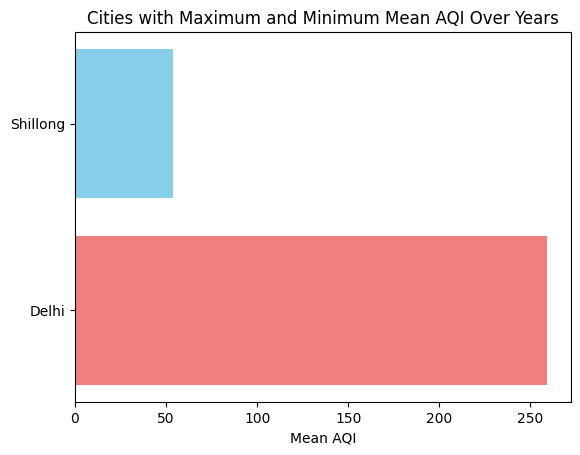

In [ ]:
mean_aqi = new_df.groupby('NAME')['AQI'].mean()
max_aqi_city = mean_aqi.idxmax()
max_aqi_value = mean_aqi[max_aqi_city]
min_aqi_city = mean_aqi.idxmin()
min_aqi_value = mean_aqi[min_aqi_city]
colors = ['lightcoral', 'skyblue']
fig, ax = plt.subplots()
ax.barh([max_aqi_city, min_aqi_city], [max_aqi_value, min_aqi_value], color=colors)

plt.title('Cities with Maximum and Minimum Mean AQI Over Years')
plt.xlabel('Mean AQI')
plt.show()

In [ ]:
pip install plotly

---
# Exploring the variation of DELHI (which is having the highest mean AQI over the years)
---

In [ ]:
delhi_data = new_df[new_df['NAME'] == 'Delhi']

In [ ]:
def make_line_bolder(trace, fig, linewidth):
    trace.line.width = linewidth
    fig.add_trace(trace)

fig = go.Figure()
parameters = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

for parameter in parameters:
    trace = go.Scatter(
        x=delhi_data['DATE'],
        y=delhi_data[parameter],
        name=parameter,
        mode='lines',
    )
    make_line_bolder(trace, fig, linewidth=4)

fig.update_layout(
    title='Variation of Air Quality Parameters Over the Years (Delhi)',
    xaxis_title='Year',
    yaxis_title='Value',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    xaxis_rangeslider_visible=True,
)
fig.show()


In [ ]:
import plotly.graph_objects as go
parameter_colors = {
    'PM10': 'blue',
    'PM2.5': 'red',
    'NO': 'green',
    'NO2': 'orange',
    'NOx': 'purple',
    'NH3': 'brown',
    'CO': 'pink',
    'SO2': 'gray',
    'O3': 'cyan',
    'Benzene': 'magenta',
    'Toluene': 'olive',
    'Xylene': 'darkblue'
}
for parameter in parameter_colors:
    fig = go.Figure()

    trace = go.Scatter(
        x=delhi_data['DATE'],
        y=delhi_data[parameter],
        name=parameter,
        mode='lines',
        line=dict(color=parameter_colors[parameter])
    )
    make_line_bolder(trace, fig, linewidth=4)

    fig.update_layout(
        title=f'Variation of {parameter} Over the Years (Delhi)',
        xaxis_title='Year',
        yaxis_title='Value',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        xaxis_rangeslider_visible=True,
    )
    fig.show()


**INSIGHT**: From these PM2.5 and PM10 plots we can see, the maximum values (spikes) are mostly in the month of November for Delhi.
Its because this is actually the time when :  


*   Firecrackers: The month of November includes the Diwali festival, which is associated with the bursting of firecrackers.
*   Crop Residue Burning: In the neighboring states of Punjab and Haryana, farmers often burn crop residues in November after the rice and wheat harvest.

Etc, these things increases pollution and realeases substancial particular matter in environment. Therefore AQI is worst in these time period.

 [particulate matter(PM) : smoke, dust, etc]


In [ ]:
def make_line_bolder(trace, fig, linewidth):
    trace.line.width = linewidth
    fig.add_trace(trace)
fig = go.Figure()

parameters = ['AQI']

for parameter in parameters:
    trace = go.Scatter(
        x=delhi_data['DATE'],
        y=delhi_data[parameter],
        name=parameter,
        mode='lines',
    )
    make_line_bolder(trace, fig, linewidth=4)

fig.update_layout(
    title='Variation of Air Quality Index Over the Years (Delhi)',
    xaxis_title='Year',
    yaxis_title='Value',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    xaxis_rangeslider_visible=True,
)
fig.show()

In [ ]:
filtered_df = new_df[(new_df['DATE'].dt.year >= 2016) & (new_df['DATE'].dt.year <= 2020)]

unique_years = filtered_df['DATE'].dt.year.unique()
lowest_aqi_list = []
lowest_city_list = []

for year in unique_years:
    aqi_year = filtered_df[filtered_df['DATE'].dt.year == year]
    average_aqi_year = aqi_year.groupby('NAME')['AQI'].mean().reset_index()
    lowest_aqi_city = average_aqi_year.loc[average_aqi_year['AQI'].idxmin()]

    lowest_aqi_list.append(lowest_aqi_city['AQI'])
    lowest_city_list.append(lowest_aqi_city['NAME'])

fig = px.line(x=unique_years, y=lowest_aqi_list, text=lowest_city_list, labels={'x': 'Year', 'y': 'AQI'},
              title='City with Lowest AQI Each Year (2016-2020)')
fig.update_traces(mode='lines+markers+text', marker=dict(color='skyblue', size=8), textposition="bottom center")
fig.update_layout(xaxis_title="Year", yaxis_title="AQI", showlegend=False, xaxis_type='category')
fig.show()


CO2 EMISSION DATASET (Global)

In [ ]:
co2=pd.read_csv("/content/drive/MyDrive/weather datasets/co2_dataset.csv")

In [ ]:
co2

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
0      Afghanistan                AFG  1750      0.000000           NaN   
1      Afghanistan                AFG  1751      0.000000           NaN   
2      Afghanistan                AFG  1752      0.000000           NaN   
3      Afghanistan                AFG  1753      0.000000           NaN   
4      Afghanistan                AFG  1754      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
0               NaN          NaN          NaN         NaN         NaN   
1               NaN          NaN          NaN         NaN         NaN   
2               NaN          NaN          NaN         NaN         NaN   
3               NaN          NaN          NaN         NaN         NaN   
4               NaN          NaN          NaN         NaN         NaN   
...             ...          ...          ...         ...         ...   
63099  12242.627935  7144.928128  1507.923185  391.992176  302.294047   
63100  12266.016285  7529.846784  1569.218392  412.115746  302.478706   
63101  12345.653374  7647.528220  1617.506786  439.253991  306.638573   
63102  11191.808551  7556.290283  1637.537532  407.583673  296.301685   
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   

       Per Capita  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
63099    4.749682  
63100    4.792753  
63101    4.775633  
63102    4.497423  
63103    4.693699  

[63104 rows x 11 columns]

In [ ]:

filtered_data = co2[(co2['Year'] >= 1800) & (co2['Year'] <= 2021)]
grouped_data = filtered_data.groupby(['Country', 'Year'])['Total'].sum().unstack().T
top_5_countries = grouped_data.sum().nlargest(6).index
top_countries_data = grouped_data[top_5_countries]
fig = px.line(top_countries_data, x=top_countries_data.index, y=top_countries_data.columns, title='Top 5 CO2 Emitting Countries over the years along with the Global CO2 emission')
fig.update_layout(xaxis_title='Year', yaxis_title='Total CO2 Emissions(in Billion metric tonnes)', legend_title='Country')
fig.show()


We can see even the global CO2 emission decreased greatly in 2020 because of COVID-19 lockdown imposed all over the world.

In [ ]:
india_data = co2[co2['Country'] == 'India']
india_data['Emissions_Change'] = india_data['Total'].diff()
max_change_year = india_data.loc[india_data['Emissions_Change'].idxmax()]['Year']
second_max_change_year = india_data.loc[india_data['Emissions_Change'].nlargest(2).idxmin()]['Year']

fig = px.line(india_data, x='Year', y='Emissions_Change', title="Year-to-Year Changes in India's Total CO2 Emissions")
fig.add_annotation(
    text=f'Max Change in {max_change_year}',
    x=max_change_year,
    y=india_data['Emissions_Change'].max(),
    showarrow=True,
    arrowhead=2,
    arrowcolor="red",
)

fig.add_annotation(
    text=f'Second Max Change in {second_max_change_year}',
    x=second_max_change_year,
    y=india_data['Emissions_Change'].nlargest(2).iloc[1],
    showarrow=True,
    arrowhead=2,
    arrowcolor="red",
)

fig.show()

print(f"Maximum change in India's total emissions occurred in {max_change_year}.")
print(f"Second maximum change in India's total emissions occurred in {second_max_change_year}.")


Maximum change in India's total emissions occurred in 2021.
Second maximum change in India's total emissions occurred in 2012.


In [ ]:
india_data = co2[(co2['Country'] == 'India') & (co2['Year'] >= 2015) & (co2['Year'] <= 2021)]
co2_df = pd.DataFrame(india_data)
co2_df.reset_index(drop=True, inplace=True)

In [ ]:
co2_df

Country ISO 3166-1 alpha-3  Year        Total         Coal         Oil  \
0   India                IND  2015  2270.766191  1487.461399  554.788779   
1   India                IND  2016  2383.815964  1529.990408  613.165557   
2   India                IND  2017  2434.867906  1560.988150  631.087430   
3   India                IND  2018  2600.446463  1677.600364  655.190293   
4   India                IND  2019  2626.459473  1677.653708  674.011463   
5   India                IND  2020  2445.011942  1588.060207  603.602160   
6   India                IND  2021  2709.683625  1802.311897  622.148121   

          Gas      Cement   Flaring  Other  Per Capita  
0  106.870633  117.507915  4.137466    NaN    1.716550  
1  113.622467  123.281311  3.756221    NaN    1.780779  
2  118.922003  121.047241  2.823083    NaN    1.798018  
3  126.201229  138.964893  2.489684    NaN    1.899518  
4  128.675994  143.664137  2.454171    NaN    1.898949  
5  127.635380  122.908202  2.805994    NaN    1.750956  
6  133.450811  149.001244  2.771552    NaN    1.925088

In [ ]:
import plotly.express as px

years = co2_df['Year']
total_emissions = co2_df['Total']

fig = px.line(x=years, y=total_emissions, title='Variation of Total CO2 Emissions in India over the Years')
fig.update_traces(marker=dict(color='red', size=8), line=dict(color='red', width=2), name='Total CO2 Emissions')
fig.update_layout(xaxis_title='Year', yaxis_title='Total CO2 Emissions')
fig.show()


Effect of COVID-19 lockdown on INDIA's CO2 emission

In [ ]:
co2_df.drop(columns=["Other"],inplace=True)

In [ ]:
co2_df

Country ISO 3166-1 alpha-3  Year        Total         Coal         Oil  \
0   India                IND  2015  2270.766191  1487.461399  554.788779   
1   India                IND  2016  2383.815964  1529.990408  613.165557   
2   India                IND  2017  2434.867906  1560.988150  631.087430   
3   India                IND  2018  2600.446463  1677.600364  655.190293   
4   India                IND  2019  2626.459473  1677.653708  674.011463   
5   India                IND  2020  2445.011942  1588.060207  603.602160   
6   India                IND  2021  2709.683625  1802.311897  622.148121   

          Gas      Cement   Flaring  Per Capita  
0  106.870633  117.507915  4.137466    1.716550  
1  113.622467  123.281311  3.756221    1.780779  
2  118.922003  121.047241  2.823083    1.798018  
3  126.201229  138.964893  2.489684    1.899518  
4  128.675994  143.664137  2.454171    1.898949  
5  127.635380  122.908202  2.805994    1.750956  
6  133.450811  149.001244  2.771552    1.925088

So we gonna find how the AQI of these states were affected based on the CO2 emission in INDIA in the particular year.

In [ ]:
new_df['Year'] = new_df['DATE'].dt.year
average_aqi = new_df.groupby(['NAME', 'Year'])['AQI'].mean().reset_index()
new_df = pd.merge(new_df, average_aqi, on=['NAME', 'Year'], suffixes=('', '_average'))
new_df.rename(columns={'AQI_average': 'Average_AQI'}, inplace=True)


In [ ]:
new_df

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN      PM2.5  \
0      IN012070800   Mumbai 2015-01-01  0.00    73  81.0  65.0  35.198393   
1      IN012070800   Mumbai 2015-01-02  0.00    74  82.0  66.0  35.198393   
2      IN012070800   Mumbai 2015-01-03  0.00    75   0.0   0.0  35.198393   
3      IN012070800   Mumbai 2015-01-04  0.00    79  89.0  69.0  35.198393   
4      IN012070800   Mumbai 2015-01-05  0.00    79  90.0  68.0  35.198393   
...            ...      ...        ...   ...   ...   ...   ...        ...   
20031  IN020040900  Chennai 2020-06-27  0.00    88  94.0  82.0  26.420000   
20032  IN020040900  Chennai 2020-06-28  0.00    86   0.0   0.0  25.930000   
20033  IN020040900  Chennai 2020-06-29  0.00    88  97.0  79.0  21.300000   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.140000   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.950000   

            PM10         NO  ...        NH3    CO        SO2         O3  \
0      96.745059  31.014133  ...  13.838278  0.00  15.197516  33.058946   
1      96.745059  31.014133  ...  13.838278  0.00  15.197516  33.058946   
2      96.745059  31.014133  ...  13.838278  0.00  15.197516  33.058946   
3      96.745059  31.014133  ...  13.838278  0.00  15.197516  33.058946   
4      96.745059  31.014133  ...  13.838278  0.00  15.197516  33.058946   
...          ...        ...  ...        ...   ...        ...        ...   
20031  39.300000   7.250000  ...  33.200000  1.10   7.290000  68.510000   
20032  45.540000   7.810000  ...  35.980000  0.76   6.480000  77.450000   
20033  22.210000   7.650000  ...  34.070000  0.96   6.620000  62.570000   
20034  30.660000   8.420000  ...  34.170000  1.05   7.500000  68.750000   
20035   4.850000   6.220000  ...  33.520000  1.02   9.230000  48.370000   

       Benzene  Toluene  Xylene         AQI  Year  Average_AQI  
0         0.00     0.00    0.00  105.352258  2015   105.352258  
1         0.00     0.00    0.00  105.352258  2015   105.352258  
2         0.00     0.00    0.00  105.352258  2015   105.352258  
3         0.00     0.00    0.00  105.352258  2015   105.352258  
4         0.00     0.00    0.00  105.352258  2015   105.352258  
...        ...      ...     ...         ...   ...          ...  
20031     0.10     0.07    2.14   95.000000  2020    80.251366  
20032     0.09     0.00    2.14   98.000000  2020    80.251366  
20033     0.09     0.01    2.14  104.000000  2020    80.251366  
20034     0.17     0.16    2.14  110.000000  2020    80.251366  
20035     0.09     0.00    2.14   92.000000  2020    80.251366  

[20036 rows x 22 columns]

Merging CO2 dataset with the AQI dataframe (new_df -> AQI + Weather_dataset)

In [ ]:
aqi_co2 = pd.merge(new_df, co2_df, left_on=['Year'], right_on=['Year'], how='inner')

In [ ]:
aqi_co2

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN      PM2.5  \
0      IN012070800   Mumbai 2015-01-01  0.00    73  81.0  65.0  35.198393   
1      IN012070800   Mumbai 2015-01-02  0.00    74  82.0  66.0  35.198393   
2      IN012070800   Mumbai 2015-01-03  0.00    75   0.0   0.0  35.198393   
3      IN012070800   Mumbai 2015-01-04  0.00    79  89.0  69.0  35.198393   
4      IN012070800   Mumbai 2015-01-05  0.00    79  90.0  68.0  35.198393   
...            ...      ...        ...   ...   ...   ...   ...        ...   
20031  IN020040900  Chennai 2020-06-27  0.00    88  94.0  82.0  26.420000   
20032  IN020040900  Chennai 2020-06-28  0.00    86   0.0   0.0  25.930000   
20033  IN020040900  Chennai 2020-06-29  0.00    88  97.0  79.0  21.300000   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.140000   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.950000   

            PM10         NO  ...  Average_AQI  Country  ISO 3166-1 alpha-3  \
0      96.745059  31.014133  ...   105.352258    India                 IND   
1      96.745059  31.014133  ...   105.352258    India                 IND   
2      96.745059  31.014133  ...   105.352258    India                 IND   
3      96.745059  31.014133  ...   105.352258    India                 IND   
4      96.745059  31.014133  ...   105.352258    India                 IND   
...          ...        ...  ...          ...      ...                 ...   
20031  39.300000   7.250000  ...    80.251366    India                 IND   
20032  45.540000   7.810000  ...    80.251366    India                 IND   
20033  22.210000   7.650000  ...    80.251366    India                 IND   
20034  30.660000   8.420000  ...    80.251366    India                 IND   
20035   4.850000   6.220000  ...    80.251366    India                 IND   

             Total         Coal         Oil         Gas      Cement   Flaring  \
0      2270.766191  1487.461399  554.788779  106.870633  117.507915  4.137466   
1      2270.766191  1487.461399  554.788779  106.870633  117.507915  4.137466   
2      2270.766191  1487.461399  554.788779  106.870633  117.507915  4.137466   
3      2270.766191  1487.461399  554.788779  106.870633  117.507915  4.137466   
4      2270.766191  1487.461399  554.788779  106.870633  117.507915  4.137466   
...            ...          ...         ...         ...         ...       ...   
20031  2445.011942  1588.060207  603.602160  127.635380  122.908202  2.805994   
20032  2445.011942  1588.060207  603.602160  127.635380  122.908202  2.805994   
20033  2445.011942  1588.060207  603.602160  127.635380  122.908202  2.805994   
20034  2445.011942  1588.060207  603.602160  127.635380  122.908202  2.805994   
20035  2445.011942  1588.060207  603.602160  127.635380  122.908202  2.805994   

       Per Capita  
0        1.716550  
1        1.716550  
2        1.716550  
3        1.716550  
4        1.716550  
...           ...  
20031    1.750956  
20032    1.750956  
20033    1.750956  
20034    1.750956  
20035    1.750956  

[20036 rows x 31 columns]

In [ ]:
aqi_co2["Average_AQI"].corr(aqi_co2["Total"])

-0.24535241033148378

In [ ]:
aqi_co2_sorted = aqi_co2.sort_values(by='Year')
city_groups = aqi_co2_sorted.groupby('NAME')
fig = px.line()

for city, city_data in city_groups:
    fig.add_scatter(x=city_data['Year'], y=city_data['Average_AQI'], mode='lines', name=city)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average AQI',
    legend=dict(orientation='h', y=1.2),
)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value',
    legend=dict(orientation='h', y=1.2),
    annotations=[dict(
        text='Variation of Average AQI vs. Year (2015-2020)',
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.2,
        showarrow=False,
        font=dict(size=16),
    )]
)


fig.show()


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 300))

aqi_co2['Total_Scaled'] = scaler.fit_transform(aqi_co2[['Total']])


Scaled the total co2 emission value to show its variation with AQI in better way

In [ ]:
aqi_co2

STATION     NAME       DATE  PRCP  TAVG  TMAX  TMIN      PM2.5  \
0      IN012070800   Mumbai 2015-01-01  0.00    73  81.0  65.0  35.198393   
1      IN012070800   Mumbai 2015-01-02  0.00    74  82.0  66.0  35.198393   
2      IN012070800   Mumbai 2015-01-03  0.00    75   0.0   0.0  35.198393   
3      IN012070800   Mumbai 2015-01-04  0.00    79  89.0  69.0  35.198393   
4      IN012070800   Mumbai 2015-01-05  0.00    79  90.0  68.0  35.198393   
...            ...      ...        ...   ...   ...   ...   ...        ...   
20031  IN020040900  Chennai 2020-06-27  0.00    88  94.0  82.0  26.420000   
20032  IN020040900  Chennai 2020-06-28  0.00    86   0.0   0.0  25.930000   
20033  IN020040900  Chennai 2020-06-29  0.00    88  97.0  79.0  21.300000   
20034  IN020040900  Chennai 2020-06-30  0.08    87  97.0  79.0  24.140000   
20035  IN020040900  Chennai 2020-07-01  0.00    87  99.0  80.0  15.950000   

            PM10         NO  ...  Country  ISO 3166-1 alpha-3        Total  \
0      96.745059  31.014133  ...    India                 IND  2270.766191   
1      96.745059  31.014133  ...    India                 IND  2270.766191   
2      96.745059  31.014133  ...    India                 IND  2270.766191   
3      96.745059  31.014133  ...    India                 IND  2270.766191   
4      96.745059  31.014133  ...    India                 IND  2270.766191   
...          ...        ...  ...      ...                 ...          ...   
20031  39.300000   7.250000  ...    India                 IND  2445.011942   
20032  45.540000   7.810000  ...    India                 IND  2445.011942   
20033  22.210000   7.650000  ...    India                 IND  2445.011942   
20034  30.660000   8.420000  ...    India                 IND  2445.011942   
20035   4.850000   6.220000  ...    India                 IND  2445.011942   

              Coal         Oil         Gas      Cement   Flaring  Per Capita  \
0      1487.461399  554.788779  106.870633  117.507915  4.137466    1.716550   
1      1487.461399  554.788779  106.870633  117.507915  4.137466    1.716550   
2      1487.461399  554.788779  106.870633  117.507915  4.137466    1.716550   
3      1487.461399  554.788779  106.870633  117.507915  4.137466    1.716550   
4      1487.461399  554.788779  106.870633  117.507915  4.137466    1.716550   
...            ...         ...         ...         ...       ...         ...   
20031  1588.060207  603.602160  127.635380  122.908202  2.805994    1.750956   
20032  1588.060207  603.602160  127.635380  122.908202  2.805994    1.750956   
20033  1588.060207  603.602160  127.635380  122.908202  2.805994    1.750956   
20034  1588.060207  603.602160  127.635380  122.908202  2.805994    1.750956   
20035  1588.060207  603.602160  127.635380  122.908202  2.805994    1.750956   

       Total_Scaled  
0          0.000000  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000  
...             ...  
20031    146.962925  
20032    146.962925  
20033    146.962925  
20034    146.962925  
20035    146.962925  

[20036 rows x 32 columns]

In [ ]:
aqi_co2_sorted = aqi_co2.sort_values(by='Year')

cities = aqi_co2['NAME'].unique()
fig = px.line()
for city in cities:
    city_data = aqi_co2_sorted[aqi_co2_sorted['NAME'] == city]
    fig.add_scatter(x=city_data['Year'], y=city_data['Average_AQI'], mode='lines', name=f'{city} - Average_AQI')

total_scaled_data = aqi_co2_sorted.groupby('Year')['Total_Scaled'].mean()
fig.add_scatter(x=total_scaled_data.index, y=total_scaled_data.values, mode='lines', name='Total Scaled (All Cities)', line=dict(dash='dash'))

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value',
    legend=dict(orientation='h', y=1.2),
    annotations=[dict(
        text='Variation of Average AQI and Total Scaled CO2 of India Over the Years (All Cities)',
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.2,
        showarrow=False,
        font=dict(size=16),
    )]
)

fig.show()


NOTE: We can see the Average AQI of the states do **not** greatly correlate with the Total CO2 emission in INDIA over the years. It indicates that the AQI of these cities depends upon other factors too, not just the CO2 emission.  

In [ ]:
aqi_co2.corr()

PRCP      TAVG      TMAX      TMIN     PM2.5      PM10  \
PRCP          1.000000  0.006397  0.002187  0.045850 -0.140404 -0.131045   
TAVG          0.006397  1.000000  0.286640  0.379173 -0.447514 -0.222702   
TMAX          0.002187  0.286640  1.000000  0.965647 -0.114976 -0.054876   
TMIN          0.045850  0.379173  0.965647  1.000000 -0.221015 -0.137962   
PM2.5        -0.140404 -0.447514 -0.114976 -0.221015  1.000000  0.609563   
PM10         -0.131045 -0.222702 -0.054876 -0.137962  0.609563  1.000000   
NO           -0.062822 -0.291699 -0.072450 -0.152852  0.590208  0.649543   
NO2          -0.103644 -0.246475 -0.107879 -0.205898  0.568212  0.646331   
NOx          -0.046506 -0.222262 -0.123200 -0.189018  0.458288  0.570817   
NH3          -0.025184 -0.124483  0.032643 -0.009364  0.274521  0.273297   
CO           -0.049947 -0.197148 -0.090616 -0.130231  0.302631  0.190295   
SO2          -0.055416 -0.106202 -0.052043 -0.105878  0.264222  0.337799   
O3           -0.106004  0.063059  0.027355 -0.036183  0.231937  0.370816   
Benzene      -0.012425 -0.147096 -0.072198 -0.089342  0.050860  0.057151   
Toluene      -0.044557 -0.190685 -0.080422 -0.120992  0.222204  0.287287   
Xylene       -0.012855 -0.027389 -0.115059 -0.094275  0.067618  0.054979   
AQI          -0.148497 -0.396043 -0.111045 -0.227143  0.902834  0.672532   
Year          0.001461 -0.091208 -0.053701 -0.041691 -0.218664 -0.130720   
Average_AQI  -0.080111 -0.101155 -0.063790 -0.138754  0.554624  0.490996   
Total         0.016250 -0.018914 -0.016470  0.009267 -0.112482 -0.049801   
Coal          0.014634 -0.022874 -0.027164 -0.000417 -0.125304 -0.058374   
Oil           0.018888 -0.003196  0.012947  0.035022 -0.070477 -0.022983   
Gas           0.007461 -0.063720 -0.035270 -0.017020 -0.187938 -0.104318   
Cement        0.018208 -0.010280 -0.030027 -0.001888 -0.083584 -0.032091   
Flaring      -0.012940  0.036345  0.014745 -0.007742  0.151576  0.077221   
Per Capita    0.019393  0.013968  0.001959  0.028783 -0.049805 -0.008180   
Total_Scaled  0.016250 -0.018914 -0.016470  0.009267 -0.112482 -0.049801   

                    NO       NO2       NOx       NH3  ...      Year  \
PRCP         -0.062822 -0.103644 -0.046506 -0.025184  ...  0.001461   
TAVG         -0.291699 -0.246475 -0.222262 -0.124483  ... -0.091208   
TMAX         -0.072450 -0.107879 -0.123200  0.032643  ... -0.053701   
TMIN         -0.152852 -0.205898 -0.189018 -0.009364  ... -0.041691   
PM2.5         0.590208  0.568212  0.458288  0.274521  ... -0.218664   
PM10          0.649543  0.646331  0.570817  0.273297  ... -0.130720   
NO            1.000000  0.684843  0.768072  0.199986  ... -0.143131   
NO2           0.684843  1.000000  0.666754  0.247535  ... -0.116250   
NOx           0.768072  0.666754  1.000000  0.154084  ... -0.114301   
NH3           0.199986  0.247535  0.154084  1.000000  ... -0.190941   
CO            0.158618  0.159801  0.159467  0.171326  ... -0.289378   
SO2           0.292691  0.376135  0.196165  0.061160  ... -0.059911   
O3            0.144852  0.349499  0.183581  0.112702  ... -0.075469   
Benzene       0.070121  0.043948  0.074647 -0.007333  ...  0.090686   
Toluene       0.232989  0.255774  0.221118  0.061725  ...  0.114079   
Xylene        0.009499  0.087267 -0.001345 -0.010797  ...  0.080451   
AQI           0.613527  0.630621  0.520528  0.292222  ... -0.285285   
Year         -0.143131 -0.116250 -0.114301 -0.190941  ...  1.000000   
Average_AQI   0.402942  0.524013  0.359279  0.262064  ... -0.422933   
Total        -0.092189  0.001325 -0.048210 -0.172235  ...  0.692607   
Coal         -0.103153 -0.012908 -0.044206 -0.181745  ...  0.713910   
Oil          -0.057234  0.040451 -0.052981 -0.134984  ...  0.575357   
Gas          -0.128730 -0.068162 -0.098740 -0.193803  ...  0.944638   
Cement       -0.084650  0.005766 -0.007095 -0.164619  ...  0.546392   
Flaring       0.104480  0.027327  0.098818  0.172880  ... -0.815692   
Per Capita   -0.055455  0.049505 -0.012851 

Registered diesel and petrol vehicles in india vs AQI

In [ ]:
regdVehicle = pd.read_csv("/content/drive/MyDrive/weather datasets/regdVehicle.csv")

In [ ]:
regdVehicle

Month  CNG ONLY  DIESEL  DIESEL/HYBRID  DUAL DIESEL/CNG  ELECTRIC(BOV)  \
0    Jan-14      2103  270915              3                0            232   
1    Feb-14      1607  219601              3                1            171   
2    Mar-14      2026  258723              3                1            220   
3    Apr-14      1718  222632              3                1            252   
4    May-14      1727  237336              6                0            186   
..      ...       ...     ...            ...              ...            ...   
110  Mar-23     34392  239185            121                0         140895   
111  Apr-23     29921  197337            121                0         111327   
112  May-23     30945  207305            135                0         158336   
113  Jun-23     34552  225327            136                0         102409   
114  Jul-23     35272  213472            133                0         116172   

     ETHANOL  LPG ONLY  NOT APPLICABLE   PETROL  PETROL/CNG  PETROL/ETHANOL  \
0          0       188           10278  1347016       20623               0   
1          1       116            8884  1176669       15266               0   
2          1       106           11115  1329273       18800               0   
3          0       121            8522  1296500       19714               1   
4          2       103            9656  1408836       20626               0   
..       ...       ...             ...      ...         ...             ...   
110        0      1699            4847  1562953       32745           12776   
111        0      1545            4336  1323102       31801           18139   
112        0      1998            4280  1548095       37213           25678   
113        0      2167            4860  1410875       41391           31854   
114        0      2282            4350  1307183       42774           36230   

     PETROL/HYBRID  PETROL/LPG  SOLAR  FUEL CELL HYDROGEN  LNG  METHANOL  \
0                0        6307      9                   0    0         0   
1                1        4803     17                   0    0         0   
2                0        5609     16                   0    0         0   
3                0        5600     19                   0    0         0   
4                1        6317     14                   0    0         0   
..             ...         ...    ...                 ...  ...       ...   
110          38119         658      0                   0   23         0   
111          27937         347      0                   0   11         0   
112          26164         208      0                   0   22         0   
113          26393         121      0                   0   13         0   
114          22867          57      0                   0    7         0   

     DUAL DIESEL/LNG  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
110                0  
111                0  
112                0  
113                0  
114                0  

[115 rows x 19 columns]

In [ ]:
regdVehicle['Month'] = pd.to_datetime(regdVehicle['Month'], format='%b-%y')
regdVehicle['Year'] = regdVehicle['Month'].dt.year
yearly_sum = regdVehicle.groupby('Year')[['DIESEL', 'PETROL','ELECTRIC(BOV)']].sum().reset_index()
yearly_sum.rename(columns={'DIESEL': 'Total_DIESEL', 'PETROL': 'Total_PETROL','ELECTRIC(BOV)':'Total_ELECTRIC'}, inplace=True)
print(yearly_sum)

   Year  Total_DIESEL  Total_PETROL  Total_ELECTRIC
0  2014       2848876      15988750            2389
1  2015       2729541      16465343            7801
2  2016       2755635      17930197           49848
3  2017       2866351      19726177           87420
4  2018       3193144      21295432          130253
5  2019       2928435      20292514          166823
6  2020       2027781      15988251          124647
7  2021       2015058      15897908          331463
8  2022       2343962      17196377         1024796
9  2023       1511312       9958148          839212


In [ ]:
yearly_sum

Year  Total_DIESEL  Total_PETROL  Total_ELECTRIC
0  2014       2848876      15988750            2389
1  2015       2729541      16465343            7801
2  2016       2755635      17930197           49848
3  2017       2866351      19726177           87420
4  2018       3193144      21295432          130253
5  2019       2928435      20292514          166823
6  2020       2027781      15988251          124647
7  2021       2015058      15897908          331463
8  2022       2343962      17196377         1024796
9  2023       1511312       9958148          839212

Merging CO2 emission dataset of INDIA with the total number of vehicles in INDIA dataset

In [ ]:
vehicle_co2 = co2_df.merge(yearly_sum, on='Year', how='inner')


In [ ]:
vehicle_co2

Country ISO 3166-1 alpha-3  Year        Total         Coal         Oil  \
0   India                IND  2015  2270.766191  1487.461399  554.788779   
1   India                IND  2016  2383.815964  1529.990408  613.165557   
2   India                IND  2017  2434.867906  1560.988150  631.087430   
3   India                IND  2018  2600.446463  1677.600364  655.190293   
4   India                IND  2019  2626.459473  1677.653708  674.011463   
5   India                IND  2020  2445.011942  1588.060207  603.602160   
6   India                IND  2021  2709.683625  1802.311897  622.148121   

          Gas      Cement   Flaring  Per Capita  Total_DIESEL  Total_PETROL  \
0  106.870633  117.507915  4.137466    1.716550       2729541      16465343   
1  113.622467  123.281311  3.756221    1.780779       2755635      17930197   
2  118.922003  121.047241  2.823083    1.798018       2866351      19726177   
3  126.201229  138.964893  2.489684    1.899518       3193144      21295432   
4  128.675994  143.664137  2.454171    1.898949       2928435      20292514   
5  127.635380  122.908202  2.805994    1.750956       2027781      15988251   
6  133.450811  149.001244  2.771552    1.925088       2015058      15897908   

   Total_ELECTRIC  
0            7801  
1           49848  
2           87420  
3          130253  
4          166823  
5          124647  
6          331463

In [ ]:
vehicle_co2.corr()

Year     Total      Coal       Oil       Gas    Cement  \
Year            1.000000  0.814273  0.840886  0.454438  0.961646  0.711910   
Total           0.814273  1.000000  0.975375  0.753724  0.915825  0.962938   
Coal            0.840886  0.975375  1.000000  0.591120  0.896513  0.954183   
Oil             0.454438  0.753724  0.591120  1.000000  0.667286  0.675283   
Gas             0.961646  0.915825  0.896513  0.667286  1.000000  0.810416   
Cement          0.711910  0.962938  0.954183  0.675283  0.810416  1.000000   
Flaring        -0.755434 -0.818821 -0.721675 -0.845694 -0.884675 -0.669184   
Per Capita      0.622712  0.961218  0.916892  0.795904  0.776781  0.960389   
Total_DIESEL   -0.603460 -0.128554 -0.277866  0.380107 -0.366817 -0.075632   
Total_PETROL   -0.174494  0.264794  0.079567  0.753438  0.094917  0.225858   
Total_ELECTRIC  0.888654  0.903569  0.961648  0.441633  0.878453  0.866339   

                 Flaring  Per Capita  Total_DIESEL  Total_PETROL  \
Year           -0.755434    0.622712     -0.603460     -0.174494   
Total          -0.818821    0.961218     -0.128554      0.264794   
Coal           -0.721675    0.916892     -0.277866      0.079567   
Oil            -0.845694    0.795904      0.380107      0.753438   
Gas            -0.884675    0.776781     -0.366817      0.094917   
Cement         -0.669184    0.960389     -0.075632      0.225858   
Flaring         1.000000   -0.740573     -0.017086     -0.487390   
Per Capita     -0.740573    1.000000      0.108951      0.434210   
Total_DIESEL   -0.017086    0.108951      1.000000      0.874518   
Total_PETROL   -0.487390    0.434210      0.874518      1.000000   
Total_ELECTRIC -0.632000    0.798461     -0.501121     -0.147881   

                Total_ELECTRIC  
Year                  0.888654  
Total                 0.903569  
Coal                  0.961648  
Oil                   0.441633  
Gas                   0.878453  
Cement                0.866339  
Flaring              -0.632000  
Per Capita            0.798461  
Total_DIESEL         -0.501121  
Total_PETROL         -0.147881  
Total_ELECTRIC        1.000000

In [ ]:
correlation_matrix = vehicle_co2.corr()
import plotly.express as px
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

fig.update_layout(
    title='Heatmap: Total Diesel, Total Petrol, Total CO2 emission and Total_Electric',
    width=1200,
    height=800,
)

# Add annotations
for i, row in enumerate(correlation_matrix.values):
    for j, val in enumerate(row):
        fig.add_annotation(
            text=f"{val:.2f}",
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            showarrow=False,
        )

fig.show()



From the above heatmap we can see the total number of diesel vehicles are more positively correlated with the CO2 emission from oil is 0.38 and that of the total petrol vehicles, the correlation is more is 0.75

General overview: That means diesel vehicles produces less **CO2 emissions** than the petrol vehicles, but in general the diesel vehicles pollute more than petrol based vehicles.

# Surprisingly: The number of electric vehicles in INDIA are highly correlated to the CO2 emission from burning COAL in INDIA(0.96)

This is particularly in INDIA.

This observation may support this fact (in INDIA specially) that surprisingly electric vehicles are causing more CO2 emissions than petrol/diesel vehicles, because of the way the electricity is generated for the charging of the Electric vehicle(EV). As for generating electricity the major source used in INDIA is coal.

In [ ]:
fig = px.scatter(vehicle_co2, x='Year', y='Coal', color='Total_ELECTRIC', size='Total_ELECTRIC', text='Year')

fig.update_layout(
    title='Scatter Plot: CO2 emissoin from Coal vs Total Electric Vehicles Over the Years (INDIA)',
    xaxis_title='Year',
    yaxis_title='Coal Emissions',
)

fig.show()


It shows how the emission from coal and the total electric vehicles vary over the years.

In [ ]:
vehicle_df_citywise = pd.read_csv("/content/drive/MyDrive/weather datasets/statewise_vehicle_regd.csv")

In [ ]:
vehicle_df_citywise

S.No Million Plus Cities   2010   2011   2012   2013   2014   2015  \
0       1                Agra    580    640    704    752    825    905   
1       2           Ahmedabad      -      -  1,682  1,796  3,196  3,420   
2       3          Aurangabad      -    253    281    310    362    426   
3       4           Bengaluru  3,491  3,791  4,156  4,591  5,050  5,560   
4       5              Bhopal    674    755    829    877    933  1,080   
5       6          Chandigarh      -      -  1,058  1,106    631    746   
6       7             Chennai  3,149  3,456  3,767  4,072  4,354  4,934   
7       8          Coimbatore  1,110  1,241  1,386  1,528  1,649  1,901   
8       9               Delhi  6,747  7,228  7,350  7,785  8,293  8,851   
9      10             Dhanbad     31     41    462    490    521    563   
10     11         Durg Bhilai      -      -    445    490    721    769   
11     12           Faridabad  7,733  8,600  8,600    NaN    NaN    NaN   
12     13           Ghaziabad    409    470    525    628    685    752   
13     14      Greater Mumbai  1,768  1,870  2,029  2,187  2,333  2,571   
14     15             Gwalior    412    449    490    530    573    618   
15     16           Hyderabad  2,728  3,033  3,387  2,040  2,203  2,369   
16     17              Indore  1,098  1,213  1,338  1,491  1,568  1,713   
17     18            Jabalpur    516    559    605    646    585    638   
18     19              Jaipur  1,549  1,694  1,871  1,962  2,121  2,249   
19     20          Jamshedpur     56     67    682    682    421    472   
20     21             Jodhpur    577    636    868    793    854    916   
21     22    Kalyan Dombivali    669    NaN    NaN    NaN    NaN    NaN   
22     23              Kannur      -      -      -      -    167    188   
23     24              Kanpur    940  1,002  1,067  1,143  1,227  1,462   
24     25               Kochi    322    409    480    547    576    606   
25     26             Kolkata    411    445    496  1,278  1,339  1,402   
26     27              Kollam      -      -      -      -    245    274   
27     28                Kota    440    473    953    554    597    654   
28     29           Kozhikoda      -      -      -      -    373    412   
29     30             Lucknow  1,107  1,211  1,315  1,424  1,553  1,710   
30     31             Madurai    530    603    680    768    833    955   
31     32          Malappuram      -      -      -      -    257    277   
32     33              Meerut    387    423    420    412    459    525   
33     34              Nagpur  1,079  1,157  1,237  1,270  1,274  1,276   
34     35              Nashik    358    398    444    490    541    622   
35     36               Patna    581    658    743    829    941   1019   
36     37      Pimprichichwad   2035    NaN    NaN    NaN    NaN    NaN   
37     38           Prayagraj    NaN    NaN    738    747    817    897   
38     39                Pune   1908   2094   2267   2347   2185   2337   
39     40              Raipur    469    527    579    639    980   1112   
40     41              Rajkot    NaN    NaN    760    827    888    979   
41     42              Ranchi    NaN    NaN    729    684     74    547   
42     43               Salem   1637    NaN    NaN    NaN    NaN    NaN   
43     44            Srinagar    172    184    201    218    218    236   
44     45               Surat    NaN    NaN   1145   1241   2244   2459   
45     46              Trichy    400    457    521    593    649    763   
46     47               Thane   2243    NaN    NaN    NaN    NaN    NaN   
47     48  Thiruvananthapuram    NaN    NaN    NaN    NaN    535    572   
48     49            Thrissur    NaN    NaN    NaN    NaN    329    355   
49     50            Varanasi    497    538    588    633    695    769   
50     51               Vasai    237    NaN    NaN    NaN    NaN    NaN   
51     52      Vashi N.Mumbai    484    NaN    NaN    NaN    NaN    NaN   
52     53          Vijayawada 

In [ ]:
vehicle_df_citywise = vehicle_df_citywise.drop(columns=['S.No'])

In [ ]:
melted_df = pd.melt(vehicle_df_citywise, id_vars=['Million Plus Cities'], var_name='Year', value_name='No. of Vehicles')
melted_df.columns = ['City', 'Year', 'No. of Vehicles']
melted_df['Year'] = melted_df['Year'].astype(int)
common_cities = set(vehicle_df_citywise['Million Plus Cities']).intersection(set(new_df['NAME']))

filtered_melted_df = melted_df[melted_df['City'].isin(common_cities)]
merged_df = pd.merge(filtered_melted_df, new_df, left_on=['City', 'Year'], right_on=['NAME', 'Year'], how='inner')


In [ ]:
merged_df

City  Year No. of Vehicles      STATION  \
0                 Chennai  2015           4,934  IN020040900   
1                 Chennai  2015           4,934  IN020040900   
2                 Chennai  2015           4,934  IN020040900   
3                 Chennai  2015           4,934  IN020040900   
4                 Chennai  2015           4,934  IN020040900   
...                   ...   ...             ...          ...   
17712  Thiruvananthapuram  2020             973  IN010100700   
17713  Thiruvananthapuram  2020             973  IN010100400   
17714  Thiruvananthapuram  2020             973  IN010100700   
17715  Thiruvananthapuram  2020             973  IN010100400   
17716  Thiruvananthapuram  2020             973  IN010100700   

                     NAME       DATE  PRCP  TAVG  TMAX  TMIN  ...    NOx  \
0                 Chennai 2015-01-01  0.00    79  86.0  71.0  ...  22.68   
1                 Chennai 2015-01-02  0.02    80  88.0  72.0  ...  23.09   
2                 Chennai 2015-01-03  0.00    80  87.0  73.0  ...   9.99   
3                 Chennai 2015-01-04  0.00    79  88.0  72.0  ...  11.71   
4                 Chennai 2015-01-05  0.00    79  85.0  73.0  ...  12.94   
...                   ...        ...   ...   ...   ...   ...  ...    ...   
17712  Thiruvananthapuram 2020-06-29  0.03    82  86.0  78.0  ...  12.88   
17713  Thiruvananthapuram 2020-06-30  0.16    81  89.0  73.0  ...  12.41   
17714  Thiruvananthapuram 2020-06-30  0.08    83  89.0  75.0  ...  12.41   
17715  Thiruvananthapuram 2020-07-01  0.00    82  91.0  76.0  ...   2.58   
17716  Thiruvananthapuram 2020-07-01  0.00    85  92.0  78.0  ...   2.58   

        NH3    CO    SO2     O3   Benzene   Toluene  Xylene         AQI  \
0      4.59  1.17   9.20  11.35  0.170000  2.595666    2.14  114.502654   
1      7.83  1.23   8.61   9.16  0.130000  2.595666    2.14  114.502654   
2      4.63  0.77  48.23  13.45  0.030000  2.595666    2.14  114.502654   
3      5.23  1.00  27.96  10.33  1.709205  2.595666    2.14  114.502654   
4      5.50  0.90  16.60   9.36  1.709205  2.595666    2.14  114.502654   
...     ...   ...    ...    ...       ...       ...     ...         ...   
17712  5.65  0.68   8.07  25.61  0.000000  0.020000    2.14   49.000000   
17713  5.88  0.53   8.40  26.00  0.000000  0.020000    2.14   40.000000   
17714  5.88  0.53   8.40  26.00  0.000000  0.020000    2.14   40.000000   
17715  5.62  0.42   6.15  22.10  0.000000  0.020000    2.14   41.000000   
17716  5.62  0.42   6.15  22.10  0.000000  0.020000    2.14   41.000000   

       Average_AQI  
0       140.084209  
1       140.084209  
2       140.084209  
3       140.084209  
4       140.084209  
...            ...  
17712    66.464481  
17713    66.464481  
17714    66.464481  
17715    66.464481  
17716    66.464481  

[17717 rows x 24 columns]

In [ ]:
merged_df['No. of Vehicles'] = merged_df['No. of Vehicles'].str.replace(',', '').astype(float)

In [ ]:
correlation_matrix = merged_df.corr()
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
    zmin=-1,
    zmax=1,
))
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(
            x=correlation_matrix.columns[i],
            y=correlation_matrix.columns[j],
            text=f"{correlation_matrix.iloc[i, j]:.2f}",
            showarrow=False,
            font=dict(size=12)
        )

fig.update_layout(
    title='Correlation Heatmap for AQI dataset merged with total number of registered vehicles(city-wise) in INDIA',
    xaxis_title='Features',
    yaxis_title='Features',
    width=1000,
    height=800
)
fig.show()


Merging the AQI dataset, city-wise number of vehicles in INDIA and the CO2 dataset.

In [ ]:
result_df = pd.merge(merged_df, co2_df, on='Year', how='inner')
print(result_df)

                     City  Year  No. of Vehicles      STATION  \
0                 Chennai  2015           4934.0  IN020040900   
1                 Chennai  2015           4934.0  IN020040900   
2                 Chennai  2015           4934.0  IN020040900   
3                 Chennai  2015           4934.0  IN020040900   
4                 Chennai  2015           4934.0  IN020040900   
...                   ...   ...              ...          ...   
17712  Thiruvananthapuram  2020            973.0  IN010100700   
17713  Thiruvananthapuram  2020            973.0  IN010100400   
17714  Thiruvananthapuram  2020            973.0  IN010100700   
17715  Thiruvananthapuram  2020            973.0  IN010100400   
17716  Thiruvananthapuram  2020            973.0  IN010100700   

                     NAME       DATE  PRCP  TAVG  TMAX  TMIN  ...  \
0                 Chennai 2015-01-01  0.00    79  86.0  71.0  ...   
1                 Chennai 2015-01-02  0.02    80  88.0  72.0  ...   
2           

In [ ]:
result_df

City  Year  No. of Vehicles      STATION  \
0                 Chennai  2015           4934.0  IN020040900   
1                 Chennai  2015           4934.0  IN020040900   
2                 Chennai  2015           4934.0  IN020040900   
3                 Chennai  2015           4934.0  IN020040900   
4                 Chennai  2015           4934.0  IN020040900   
...                   ...   ...              ...          ...   
17712  Thiruvananthapuram  2020            973.0  IN010100700   
17713  Thiruvananthapuram  2020            973.0  IN010100400   
17714  Thiruvananthapuram  2020            973.0  IN010100700   
17715  Thiruvananthapuram  2020            973.0  IN010100400   
17716  Thiruvananthapuram  2020            973.0  IN010100700   

                     NAME       DATE  PRCP  TAVG  TMAX  TMIN  ...  \
0                 Chennai 2015-01-01  0.00    79  86.0  71.0  ...   
1                 Chennai 2015-01-02  0.02    80  88.0  72.0  ...   
2                 Chennai 2015-01-03  0.00    80  87.0  73.0  ...   
3                 Chennai 2015-01-04  0.00    79  88.0  72.0  ...   
4                 Chennai 2015-01-05  0.00    79  85.0  73.0  ...   
...                   ...        ...   ...   ...   ...   ...  ...   
17712  Thiruvananthapuram 2020-06-29  0.03    82  86.0  78.0  ...   
17713  Thiruvananthapuram 2020-06-30  0.16    81  89.0  73.0  ...   
17714  Thiruvananthapuram 2020-06-30  0.08    83  89.0  75.0  ...   
17715  Thiruvananthapuram 2020-07-01  0.00    82  91.0  76.0  ...   
17716  Thiruvananthapuram 2020-07-01  0.00    85  92.0  78.0  ...   

       Average_AQI  Country  ISO 3166-1 alpha-3        Total         Coal  \
0       140.084209    India                 IND  2270.766191  1487.461399   
1       140.084209    India                 IND  2270.766191  1487.461399   
2       140.084209    India                 IND  2270.766191  1487.461399   
3       140.084209    India                 IND  2270.766191  1487.461399   
4       140.084209    India                 IND  2270.766191  1487.461399   
...            ...      ...                 ...          ...          ...   
17712    66.464481    India                 IND  2445.011942  1588.060207   
17713    66.464481    India                 IND  2445.011942  1588.060207   
17714    66.464481    India                 IND  2445.011942  1588.060207   
17715    66.464481    India                 IND  2445.011942  1588.060207   
17716    66.464481    India                 IND  2445.011942  1588.060207   

              Oil         Gas      Cement   Flaring  Per Capita  
0      554.788779  106.870633  117.507915  4.137466    1.716550  
1      554.788779  106.870633  117.507915  4.137466    1.716550  
2      554.788779  106.870633  117.507915  4.137466    1.716550  
3      554.788779  106.870633  117.507915  4.137466    1.716550  
4      554.788779  106.870633  117.507915  4.137466    1.716550  
...           ...         ...         ...       ...         ...  
17712  603.602160  127.635380  122.908202  2.805994    1.750956  
17713  603.602160  127.635380  122.908202  2.805994    1.750956  
17714  603.602160  127.635380  122.908202  2.805994    1.750956  
17715  603.602160  127.635380  122.908202  2.805994    1.750956  
17716  603.602160  127.635380  122.908202  2.805994    1.750956  

[17717 rows x 33 columns]

In [ ]:
result_df.corr()

Year  No. of Vehicles      PRCP      TAVG      TMAX  \
Year             1.000000        -0.141016  0.010569 -0.054001 -0.026777   
No. of Vehicles -0.141016         1.000000 -0.053807 -0.044447  0.117190   
PRCP             0.010569        -0.053807  1.000000  0.012179  0.007345   
TAVG            -0.054001        -0.044447  0.012179  1.000000  0.270873   
TMAX            -0.026777         0.117190  0.007345  0.270873  1.000000   
TMIN            -0.009539         0.053209  0.046359  0.366142  0.967954   
PM2.5           -0.250845         0.238663 -0.152125 -0.480887 -0.121875   
PM10            -0.134445         0.556676 -0.146161 -0.251431 -0.070064   
NO              -0.124651         0.310339 -0.086982 -0.349625 -0.106523   
NO2             -0.110206         0.338040 -0.111641 -0.288375 -0.131155   
NOx             -0.094726         0.263274 -0.078009 -0.297345 -0.182212   
NH3             -0.210370         0.417053 -0.005230 -0.142576  0.035418   
CO              -0.352512         0.140246 -0.038631 -0.212968 -0.097124   
SO2             -0.038838         0.165306 -0.078977 -0.141746 -0.075639   
O3              -0.076408         0.252904 -0.111005  0.066612  0.019757   
Benzene          0.083368         0.001323 -0.014965 -0.168893 -0.144879   
Toluene          0.108696         0.337547 -0.056739 -0.194919 -0.101367   
Xylene           0.068702        -0.107273  0.004299 -0.009831 -0.106843   
AQI             -0.314965         0.342939 -0.161518 -0.433284 -0.122860   
Average_AQI     -0.479360         0.521934 -0.070284 -0.128626 -0.070490   
Total            0.688430        -0.120209  0.023763 -0.005555 -0.010254   
Coal             0.709336        -0.125296  0.024398 -0.008343 -0.020524   
Oil              0.571284        -0.098211  0.021125  0.004890  0.017191   
Gas              0.943378        -0.142860  0.016553 -0.034620 -0.014577   
Cement           0.544163        -0.105659  0.025553 -0.001769 -0.031435   
Flaring         -0.811947         0.126397 -0.022071  0.016767 -0.000667   
Per Capita       0.444978        -0.091346  0.024883  0.015143 -0.001345   

                     TMIN     PM2.5      PM10        NO       NO2  ...  \
Year            -0.009539 -0.250845 -0.134445 -0.124651 -0.110206  ...   
No. of Vehicles  0.053209  0.238663  0.556676  0.310339  0.338040  ...   
PRCP             0.046359 -0.152125 -0.146161 -0.086982 -0.111641  ...   
TAVG             0.366142 -0.480887 -0.251431 -0.349625 -0.288375  ...   
TMAX             0.967954 -0.121875 -0.070064 -0.106523 -0.131155  ...   
TMIN             1.000000 -0.231807 -0.153094 -0.189610 -0.230871  ...   
PM2.5           -0.231807  1.000000  0.598719  0.639842  0.564917  ...   
PM10            -0.153094  0.598719  1.000000  0.669306  0.642638  ...   
NO              -0.189610  0.639842  0.669306  1.000000  0.707483  ...   
NO2             -0.230871  0.564917  0.642638  0.707483  1.000000  ...   
NOx             -0.247045  0.527127  0.612084  0.789130  0.713277  ...   
NH3             -0.007111  0.244175  0.259772  0.221852  0.222686  ...   
CO              -0.134743  0.284167  0.175220  0.168469  0.137149  ...   
SO2             -0.133081  0.294056  0.350039  0.281232  0.390341  ...   
O3              -0.040901  0.217309  0.362815  0.146314  0.338061  ...   
Benzene         -0.163320  0.164667  0.200337  0.258256  0.207345  ...   
Toluene         -0.152837  0.343538  0.475093  0.436335  0.441861  ...   
Xylene          -0.082637  0.039082  0.046662  0.033257  0.077517  ...   
AQI             -0.242534  0.907899  0.671028  0.652946  0.620451  ...   
Average_AQI     -0.150838  0.536396  0.491469  0.454905  0.513064  ...   
Total            0.022440 -0.138339 -0.057089 -0.090933 -0.002258  ...   
Coal             0.013009 -0.152392 -0.065933 -0.101554 -0.017400  ...   
Oil              0.046297 -0.091504 -0.029545 -0.057760  0.038225  ...   
Gas              0.010402 -0.220451 -0.110380 -0.116644 -0.066308  ...   
Cement           0.002203 -0.104525 -0.038

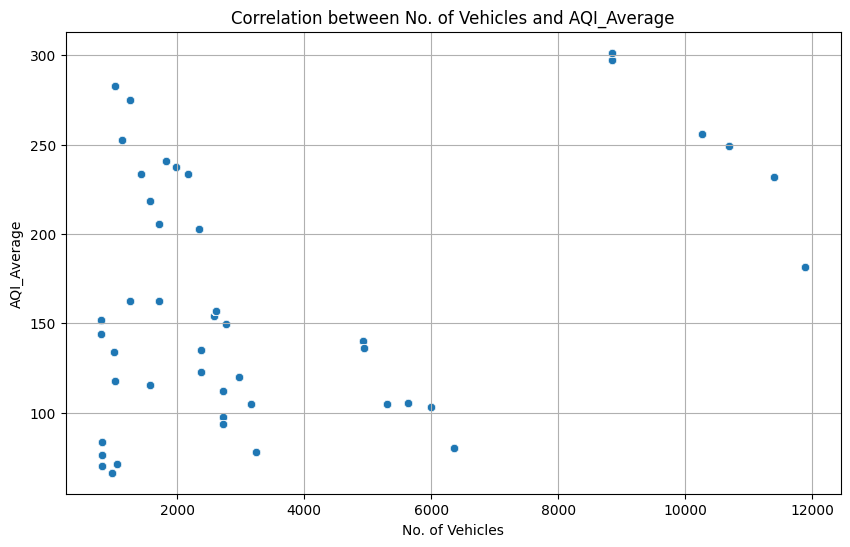

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='No. of Vehicles', y='Average_AQI')
plt.title('Correlation between No. of Vehicles and AQI_Average')
plt.xlabel('No. of Vehicles')
plt.ylabel('AQI_Average')
plt.grid(True)

plt.show()


This graph shows that there is no good direct correlation between average AQI and the number of vehicles.

# Predicting: AQI (Multiple linear Regression)

In [ ]:
new_df.shape

(20036, 22)

In [ ]:
new_df.describe()

PRCP          TAVG          TMAX          TMIN         PM2.5  \
count  20036.000000  20036.000000  20036.000000  20036.000000  20036.000000   
mean       0.122185     79.974196     77.674236     59.231533     72.868244   
std        0.523902     10.302196     33.818983     26.877844     68.447020   
min        0.000000     43.000000      0.000000      0.000000      2.000000   
25%        0.000000     76.000000     79.000000     53.000000     31.740000   
50%        0.000000     82.000000     90.000000     71.000000     50.075000   
75%        0.000000     87.000000     96.000000     77.000000     89.445000   
max       14.760000    105.000000    127.000000     94.000000    917.770000   

               PM10            NO           NO2           NOx           NH3  \
count  20036.000000  20036.000000  20036.000000  20036.000000  20036.000000   
mean     113.482871     20.854136     30.962649     36.466719     27.150277   
std       92.766236     25.222837     23.161660     35.768064     25.494630   
min        0.210000      0.110000      0.010000      0.000000      0.020000   
25%       52.859050      5.610000     13.900000     12.670000     13.500000   
50%       91.931532     11.210000     25.555212     25.100000     18.890000   
75%      127.347500     30.530000     41.632500     49.102500     34.730000   
max      985.000000    221.410000    266.460000    467.630000    352.890000   

                 CO           SO2            O3       Benzene       Toluene  \
count  20036.000000  20036.000000  20036.000000  20036.000000  20036.000000   
mean       1.222944     11.960674     38.114500      3.278762      8.197906   
std        1.661772     10.484817     21.049414     15.699905     18.668746   
min        0.000000      0.360000      0.010000      0.000000      0.000000   
25%        0.540000      6.000000     24.890000      0.120000      0.020000   
50%        0.930000      9.560000     33.611005      1.173353      2.810000   
75%        1.370000     15.197516     47.610000      2.990000      9.780000   
max       32.220000    193.860000    257.730000    455.030000    454.850000   

             Xylene           AQI          Year   Average_AQI  
count  20036.000000  20036.000000  20036.000000  20036.000000  
mean       1.891619    161.633841   2017.763276    161.633841  
std        3.793473    108.974046      1.585406     73.507389  
min        0.000000     14.000000   2015.000000     49.172345  
25%        0.180000     83.000000   2017.000000    104.646604  
50%        1.439220    116.000000   2018.000000    140.084209  
75%        2.140000    220.000000   2019.000000    233.715507  
max      170.370000    737.000000   2020.000000    301.343669

In [ ]:
X= new_df[['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene']]
y= new_df['AQI']

# Outlier detection and removal

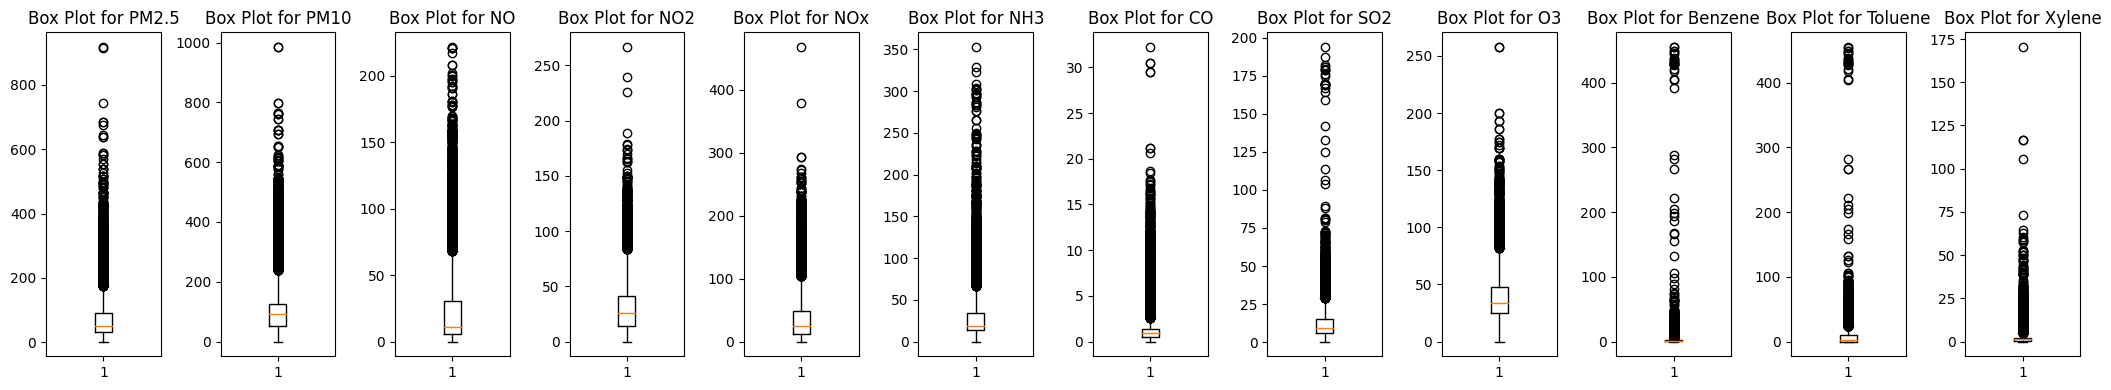

In [ ]:
columns_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_check), figsize=(21, 4))

for i, column in enumerate(columns_to_check):
    axes[i].boxplot(X[column])
    axes[i].set_title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()


In [ ]:
columns_to_check = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene']
z_scores = stats.zscore(X[columns_to_check])

threshold = 3
non_outlier_indices = (z_scores <= threshold).all(axis=1)

X_no_outliers = X[non_outlier_indices]

print(X_no_outliers)

           PM2.5       PM10         NO        NO2    NOx        NH3    CO  \
0      35.198393  96.745059  31.014133  25.555212  27.38  13.838278  0.00   
1      35.198393  96.745059  31.014133  25.555212  26.20  13.838278  0.00   
2      35.198393  96.745059  31.014133  25.555212  26.04  13.838278  0.00   
3      35.198393  96.745059  31.014133  25.555212  25.97  13.838278  0.00   
4      35.198393  96.745059  31.014133  25.555212  25.18  13.838278  0.00   
...          ...        ...        ...        ...    ...        ...   ...   
20031  26.420000  39.300000   7.250000  12.960000  19.59  33.200000  1.10   
20032  25.930000  45.540000   7.810000  10.000000  16.39  35.980000  0.76   
20033  21.300000  22.210000   7.650000   9.690000  16.74  34.070000  0.96   
20034  24.140000  30.660000   8.420000  12.380000  20.29  34.170000  1.05   
20035  15.950000   4.850000   6.220000  10.720000  16.44  33.520000  1.02   

             SO2         O3  Benzene  Toluene  Xylene  
0      15.197516  3

Outlier removal, the threshold value is taken as 3. Which means the data within 3 times of the standard deviation is considered and outside it is rejected.  

In [ ]:
X = X_no_outliers

In [ ]:
X

PM2.5       PM10         NO        NO2    NOx        NH3    CO  \
0      35.198393  96.745059  31.014133  25.555212  27.38  13.838278  0.00   
1      35.198393  96.745059  31.014133  25.555212  26.20  13.838278  0.00   
2      35.198393  96.745059  31.014133  25.555212  26.04  13.838278  0.00   
3      35.198393  96.745059  31.014133  25.555212  25.97  13.838278  0.00   
4      35.198393  96.745059  31.014133  25.555212  25.18  13.838278  0.00   
...          ...        ...        ...        ...    ...        ...   ...   
20031  26.420000  39.300000   7.250000  12.960000  19.59  33.200000  1.10   
20032  25.930000  45.540000   7.810000  10.000000  16.39  35.980000  0.76   
20033  21.300000  22.210000   7.650000   9.690000  16.74  34.070000  0.96   
20034  24.140000  30.660000   8.420000  12.380000  20.29  34.170000  1.05   
20035  15.950000   4.850000   6.220000  10.720000  16.44  33.520000  1.02   

             SO2         O3  Benzene  Toluene  Xylene  
0      15.197516  33.058946     0.00     0.00    0.00  
1      15.197516  33.058946     0.00     0.00    0.00  
2      15.197516  33.058946     0.00     0.00    0.00  
3      15.197516  33.058946     0.00     0.00    0.00  
4      15.197516  33.058946     0.00     0.00    0.00  
...          ...        ...      ...      ...     ...  
20031   7.290000  68.510000     0.10     0.07    2.14  
20032   6.480000  77.450000     0.09     0.00    2.14  
20033   6.620000  62.570000     0.09     0.01    2.14  
20034   7.500000  68.750000     0.17     0.16    2.14  
20035   9.230000  48.370000     0.09     0.00    2.14  

[17398 rows x 12 columns]

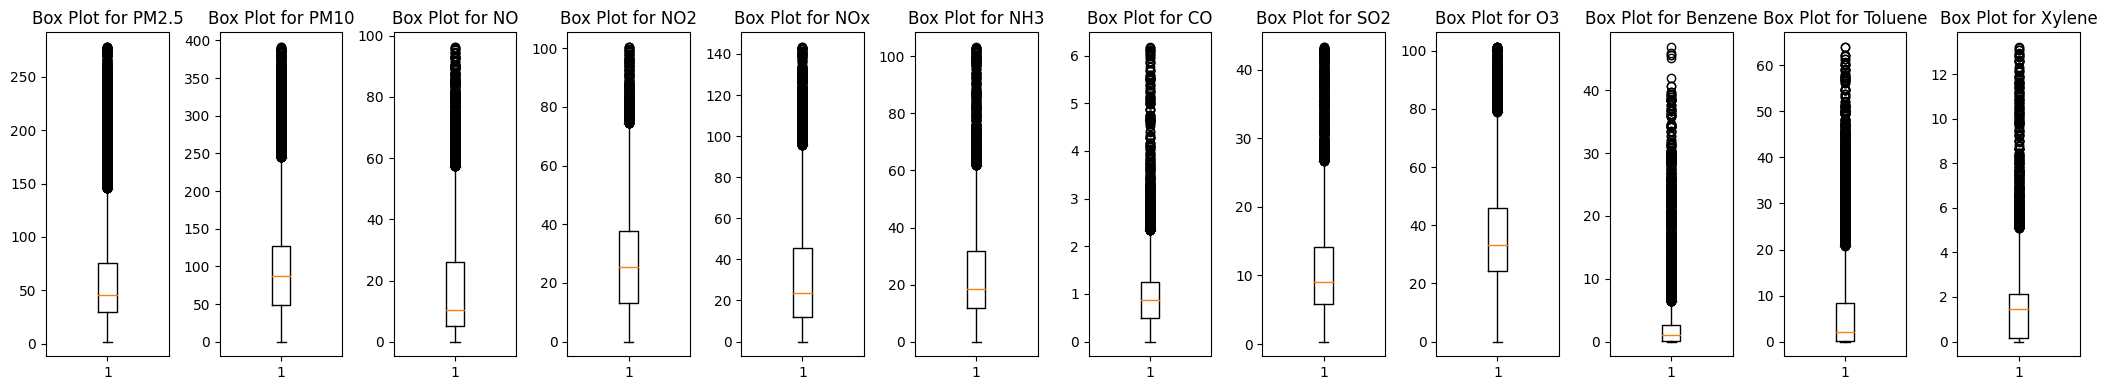

In [ ]:
columns_to_check = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_check), figsize=(21, 4))
for i, column in enumerate(columns_to_check):
    axes[i].boxplot(X[column])
    axes[i].set_title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()


# Distrubution of AQI (dependent target variable)

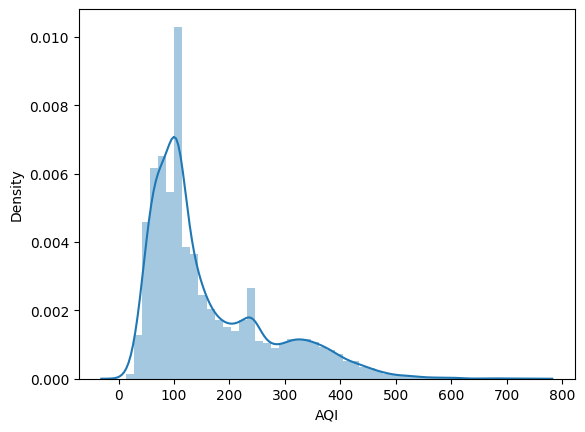

In [ ]:
sns.distplot(new_df['AQI']);

In [ ]:
correlation_matrix = new_df.corr()
fig = px.imshow(correlation_matrix)
fig.update_layout(
    title='Correlation Heatmap',
    width=1000,
    height=900,
)

annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, val in enumerate(row):
        annotations.append(
            dict(
                x=j,
                y=i,
                text=f"{val:.2f}",
                showarrow=False,
                font=dict(size=10),
            )
        )

fig.update_layout(annotations=annotations)

fig.show()



In [ ]:
new_df.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'Year', 'Average_AQI'],
      dtype='object')

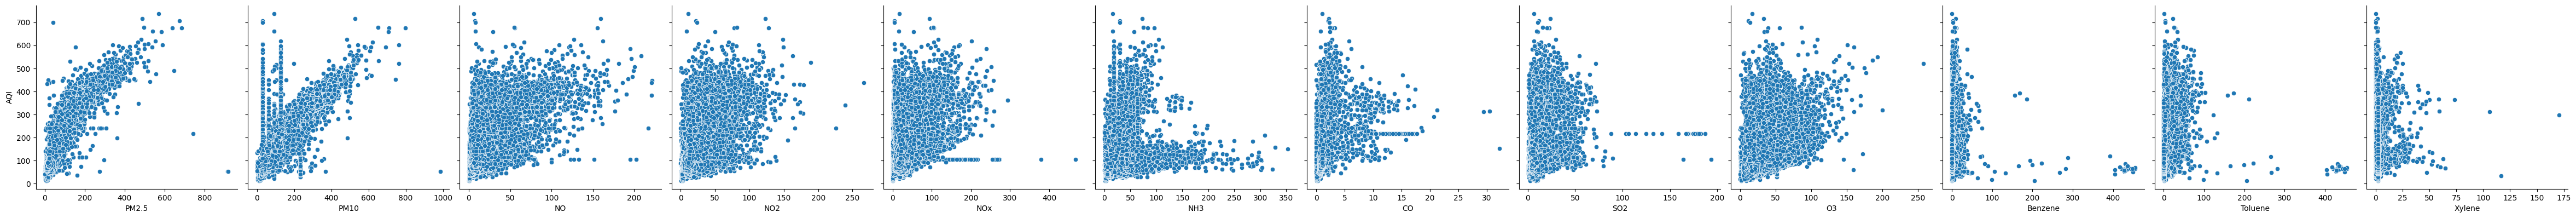

In [ ]:
sns.pairplot(new_df, x_vars=['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene'], y_vars='AQI', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
X.dropna(inplace=True)
y = y.loc[X.index]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
y_train.shape

(12178,)

In [ ]:
y_test.shape

(5220,)

---
Using Linear regression since the target variable (AQI) is continuous

---



In [ ]:
reg_model = linear_model.LinearRegression()

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [ ]:
y_pred

array([252.60810857, 136.04241048, 113.11391335, ..., 143.53154212,
        94.08635333,  45.17017083])

In [ ]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

Actual value  Predicted value
13082        252.00       252.608109
8734          87.00       136.042410
12250         93.00       113.113913
5849         251.00       271.035889
14383        241.04       235.834552
...             ...              ...
7856          80.00        60.682030
1600          84.00        79.028189
18506        134.00       143.531542
19688         84.00        94.086353
2006          54.00        45.170171

[5220 rows x 2 columns]

In [ ]:
correlation = reg_model_diff['Actual value'].corr(reg_model_diff['Predicted value'])
print(f'Correlation between "Actual value" and "Predicted value": {correlation:.2f}')

Correlation between "Actual value" and "Predicted value": 0.94


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 20.410120912059437
Mean Square Error: 953.7929625024996
Root Mean Square Error: 30.883538697864587


Since the MAE is 20.4101 that means on average, the model's predictions are varying by about 20.41 units from the true values.

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.8797428746835104


Since the R2 value is 0.8797, which is close to 1. Therefore it is fairly good model, with good accuracy. Having target variable y varying over 87.97% with respect to the independent variables or can say 87% of the variance in the dependent variable can be explained by the independent variables

In [ ]:
fig = px.scatter(reg_model_diff, x='Actual value', y='Predicted value', title='Actual vs Predicted Values',trendline="ols")
fig.update_layout(
    xaxis_title='Actual Value',
    yaxis_title='Predicted Value',
)
fig.update_traces(line_color='red')
fig.show()

Scatter plot to show the correlation of the Predicted value with the actual value.

Since the points are densly clustered, actual value and predicted value are strongly correlated